# Triaction package
<img src="logo.png" width=200 height=100>

## Table of Contents
* [1. Computation of the measures for the set of triplets](#section_1)
* [2. Comparison of different measures](#section_2)
* [3. Distribution for an edge](#section_3)
* [4. Visualisation of triadic network](#section_4)

In [1]:
from triaction.analysis import decision_tree, visualisation_conditioned
from triaction.analysis import decision_tree_val, visualisation_conditioned_val
from more_itertools import unique_everseen
import matplotlib.pyplot as plt
import matplotlib as mpl
import triaction.infocore as ifc
import networkx as nx
import seaborn as sns
import pandas as pd
import scipy as sp
import numpy as np
import random
import glob
import os

/Users/anthonybaptista/opt/anaconda3/envs/triaction/lib/python3.9/site-packages/coniii/samplers.py:381: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterate_neighbors(n,ix,expdJ,r):
/Users/anthonybaptista/opt/anaconda3/envs/triaction/lib/python3.9/site-packages/coniii/samplers.py:2342: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cross(vec1, vec2):


In [2]:
# The following notebook assumes that the set of triplets has been already defined.
save_folder = "output"
try : 
    os.mkdir(save_folder)
except OSError : 
    pass

gene_expression = pd.read_csv('data/reduce_gene_expression.tsv', sep = '\t', index_col=0)
triadic_set = pd.read_csv('data/final.tsv', sep = '\t')

In [3]:
ppi = pd.read_csv('data/reduce_ppi.tsv', sep = '\t')
graph_ppi = nx.from_pandas_edgelist(ppi, source = '0', target = '1')
Gcc = sorted(nx.connected_components(graph_ppi), key=len, reverse=True)
G0 = graph_ppi.subgraph(Gcc[0])
#print(nx.diameter(G0)) -> 4
list_node = list(graph_ppi.nodes())
print('PPI')
print('number of edges: ', len(graph_ppi.edges()))
print('number of nodes: ', len(graph_ppi.nodes()))

PPI
number of edges:  42511
number of nodes:  639


In [4]:
gene_expression

TCGA-AB-2876-03A  TCGA-AB-2952-03B  TCGA-AB-2915-03A  \
NFYA           11.718391         11.015797         11.563136   
ARX             0.627285          0.892046          0.713059   
MEOX1           1.952423          3.638907          1.328262   
SOX8            1.205366          4.168124          2.541573   
ZFX            12.462581         11.646989         12.218397   
...                  ...               ...               ...   
FOXD1           0.627285          4.479925          0.713059   
ZNF350         10.218189          8.952858          9.563462   
CUX1           14.021152         12.564816         12.621574   
HOXB7           2.437957          2.327717          1.749818   
TCF24           0.627285          1.539972          0.713059   

        TCGA-AB-2929-03A  TCGA-AB-2938-03A  TCGA-AB-2849-03A  \
NFYA           11.625043         11.974561         12.686500   
ARX             0.016001          1.516500          0.004867   
MEOX1           2.298384          2.592035          1.911397   
SOX8            0.016001          2.305108          4.896737   
ZFX            13.431845         11.388452         11.751944   
...                  ...               ...               ...   
FOXD1           0.432136          2.721930          0.070821   
ZNF350          9.773062          9.441410          9.789384   
CUX1           12.640061         13.497097         14.386584   
HOXB7           0.932530          3.498137          1.911397   
TCF24           2.107932          2.721930          0.460228   

        TCGA-AB-2877-03A  TCGA-AB-2986-03A  TCGA-AB-2971-03A  \
NFYA           11.596328         11.365092         11.495804   
ARX             1.140249          2.883369          1.604872   
MEOX1           1.585473          1.220719          3.033813   
SOX8            4.987690          1.804591          3.033813   
ZFX            12.152364         11.774591         12.277198   
...                  ...               ...               ...   
FOXD1           1.140249          0.120942          0.366047   
ZNF350          9.823059          9.748039         10.027088   
CUX1           14.467876         14.253688         14.007477   
HOXB7           5.849596          5.352717          6.691256   
TCF24           0.519949          2.433101          0.366047   

        TCGA-AB-2955-03A  ...  TCGA-AB-2979-03B  TCGA-AB-2928-03A  \
NFYA           11.950957  ...         11.555033         11.603535   
ARX             0.018067  ...          1.765541          0.039797   
MEOX1           0.528005  ...          3.266452          0.039797   
SOX8            1.678632  ...          3.266452          5.820970   
ZFX            12.861790  ...         11.691176         12.595078   
...                  ...  ...               ...               ...   
FOXD1           0.528005  ...          1.080222          0.039797   
ZNF350         10.602198  ...          9.184381          9.648799   
CUX1           13.765336  ...         13.908657         12.978602   
HOXB7           0.018067  ...          1.765541          0.701927   
TCF24           2.924172  ...          1.080222          2.014650   

        TCGA-AB-2825-03A  TCGA-AB-2873-03A  TCGA-AB-2920-03B  \
NFYA           10.882933         11.322924         10.954068   
ARX             2.315755          1.261999          0.598371   
MEOX1           2.807471          3.666987          0.027852   
SOX8            1.540766          2.320720          4.045007   
ZFX            12.058522         11.998123         11.030582   
...                  ...               ...               ...   
FOXD1           0.844958          3.207426          1.561702   
ZNF350          9.261912          9.152161          9.295748   
CUX1           13.548267         13.639568         12.919900   
HOXB7           6.777159          7.175480          2.826131   
TCF24           0.844958          0.025368          0.598371   

        TCGA-AB-2862-03A  TCGA-AB-2939-03A  TCGA-AB-2927-03A  \
NFYA           11.943764         12.034

## 1. Computation of the measures for the set of triplets  <a class="anchor" id="section_1"></a> 

### 1.1. Computation of the measures  <a class="anchor" id="section_1_1"></a> 

### 1.1.1. Longer range  <a class="anchor" id="section_1_1_1"></a> 

In [5]:
long_range = pd.read_csv('data/long_range.txt', sep = '\t')

In [6]:
print('P<0.1:', len(long_range[long_range['P']<0.1])/len(long_range)*100)
print('P<0.05:', len(long_range[long_range['P']<0.05])/len(long_range)*100)
print('P<0.01:', len(long_range[long_range['P']<0.01])/len(long_range)*100)
print('P<0.005:', len(long_range[long_range['P']<0.005])/len(long_range)*100)
print('P<0.001:', len(long_range[long_range['P']<0.001])/len(long_range)*100)
print('P<0.0002:', len(long_range[long_range['P']==0.0002])/len(long_range)*100) # limit P = 1/5000 = 0.0002

P<0.1: 12.04
P<0.05: 6.34
P<0.01: 1.48
P<0.005: 0.8200000000000001
P<0.001: 0.13999999999999999
P<0.0002: 0.06


In [7]:
top_long_range = long_range[long_range['P']<0.001].sort_values(by = 'Theta', ascending = False)
unique_long_range = np.unique(top_long_range[['node1','node2']].values.astype(str), axis=0)
print('unique long range edge:', len(unique_long_range))

unique long range edge: 5


### 1.1.2. Short range  <a class="anchor" id="section_1_1_1"></a> 

In [8]:
short_range = pd.read_csv('data/short_range.txt', sep = '\t')

In [9]:
print('P<0.1:', len(short_range[short_range['P']<0.1])/len(short_range)*100)
print('P<0.05:', len(short_range[short_range['P']<0.05])/len(short_range)*100)
print('P<0.01:', len(short_range[short_range['P']<0.01])/len(short_range)*100)
print('P<0.005:', len(short_range[short_range['P']<0.005])/len(short_range)*100)
print('P<0.001:', len(short_range[short_range['P']<0.001])/len(short_range)*100)
print('P<0.0002:', len(short_range[short_range['P']==0.0002])/len(short_range)*100) # limit P = 1/5000 = 0.0002

P<0.1: 16.400000000000002
P<0.05: 9.66
P<0.01: 3.56
P<0.005: 2.82
P<0.001: 1.54
P<0.0002: 1.24


In [10]:
top_short_range = short_range[short_range['P']<0.001].sort_values(by = 'Theta', ascending = False)
unique_short_range = np.unique(top_short_range[['node1','node2']].values.astype(str), axis=0)
print('unique short range edge:', len(unique_short_range))

unique short range edge: 32


In [11]:
def number_different_nodes(data):
    out = len(np.unique(data['reg'].values))
    return out

def number_different_edges(data):
    edges_list = list()
    for k in range(len(data)):
        temp = (data['node1'].iloc[k], data['node2'].iloc[k])
        edges_list.append(temp)
    out = len(list(dict.fromkeys(edges_list)))
    return out
   
print('Short range')
print('number different nodes: ', number_different_nodes(short_range))
print('number different edges: ', number_different_edges(short_range)) 

print('Long range')
print('number different nodes: ', number_different_nodes(long_range))
print('number different edges: ', number_different_edges(long_range)) 

Short range
number different nodes:  293
number different edges:  3377
Long range
number different nodes:  198
number different edges:  2224


## 2. Comparison of different measures  <a class="anchor" id="section_2"></a> 

In [12]:
def vis_measures(data, title = None):
    Theta = data['Theta'].astype(float)
    Theta_T = data['Theta_T'].astype(float)
    Theta_Tn = data['Theta_Tn'].astype(float)
    density = sp.stats.gaussian_kde(Theta)
    n, x, _ = plt.hist(Theta, bins = np.linspace(0, np.max(Theta), 50), histtype=u'step', density=True)  
    plt.plot(x, density(x), label = '$\mathregular{\Theta_\Sigma}$')

    density = sp.stats.gaussian_kde(Theta_T)
    n, x, _ = plt.hist(Theta_T, bins = np.linspace(0, np.max(Theta_T), 50), histtype=u'step', density=True)  
    plt.plot(x, density(x), label = '$\mathregular{\Theta_T}$')

    density = sp.stats.gaussian_kde(Theta_Tn)
    n, x, _ = plt.hist(Theta_Tn, bins = np.linspace(0, np.max(Theta_Tn), 50), histtype=u'step', density=True)  
    plt.plot(x, density(x), label = '$\mathregular{\Theta_{Tn}}$')

    plt.xlabel('$\mathregular{\Theta}$', fontsize=12)
    plt.ylabel('Probability density function', fontsize=12)
    plt.yscale('log')
    if title != None:
        plt.title(title)
    plt.legend()
    plt.savefig(save_folder + '/' + 'zscore_m.png', format = 'png', dpi = 600)
    plt.show()

In [13]:
def vis_measures2(data1, data2, title = None):
    Theta = data1['Theta'].astype(float)
    Theta_T = data1['Theta_T'].astype(float)
    Theta_Tn = data1['Theta_Tn'].astype(float)
    density = sp.stats.gaussian_kde(Theta)
    n, x, _ = plt.hist(Theta, bins = np.linspace(0, np.max(Theta), 50), histtype=u'step', density=True, alpha = 0)  
    plt.plot(x, density(x), label = '$\mathregular{\Sigma}$', color = 'lightblue')

    density = sp.stats.gaussian_kde(Theta_T)
    n, x, _ = plt.hist(Theta_T, bins = np.linspace(0, np.max(Theta_T), 50), histtype=u'step', density=True, alpha = 0)
    plt.plot(x, density(x), label = '$\mathregular{T}$', color = 'royalblue')

    density = sp.stats.gaussian_kde(Theta_Tn)
    n, x, _ = plt.hist(Theta_Tn, bins = np.linspace(0, np.max(Theta_Tn), 50), histtype=u'step', density=True, alpha = 0) 
    plt.plot(x, density(x), label = '$\mathregular{Tn}$', color = 'navy')
    plt.legend()
    
    Theta = data2['Theta'].astype(float)
    Theta_T = data2['Theta_T'].astype(float)
    Theta_Tn = data2['Theta_Tn'].astype(float)
    density = sp.stats.gaussian_kde(Theta)
    n, x, _ = plt.hist(Theta, bins = np.linspace(0, np.max(Theta), 50), histtype=u'step', density=True, alpha = 0)
    plt.plot(x, density(x), label = '$\mathregular{\Sigma}$', color = 'lightcoral')

    density = sp.stats.gaussian_kde(Theta_T)
    n, x, _ = plt.hist(Theta_T, bins = np.linspace(0, np.max(Theta_T), 50), histtype=u'step', density=True, alpha = 0)  
    plt.plot(x, density(x), label = '$\mathregular{T}$', color = 'indianred')

    density = sp.stats.gaussian_kde(Theta_Tn)
    n, x, _ = plt.hist(Theta_Tn, bins = np.linspace(0, np.max(Theta_Tn), 50), histtype=u'step', density=True, alpha = 0)
    plt.plot(x, density(x), label = '$\mathregular{Tn}$', color = 'firebrick')

    plt.xlabel('$\mathregular{\Theta}$', fontsize=12)
    plt.ylabel('Probability density function', fontsize=12)
    plt.yscale('log')
    if title != None:
        plt.title('$\mathregular{i}$'.replace('i', title))
    lines = plt.gca().get_lines()
    legend1 = plt.legend([lines[i] for i in [0,1,2]],[lines[i].get_label() for i in [0,1,2]], loc=3, title = "short range")
    legend2 = plt.legend([lines[i] for i in [3,4,5]],['$\mathregular{\Sigma}$','$\mathregular{T}$', '$\mathregular{Tn}$'], loc=8, title = "long range")
    plt.gca().add_artist(legend1)
    plt.savefig(save_folder + '/' + 'zscore_m2.png', format = 'png', dpi = 600)
    plt.show()

In [14]:
def vis_corr_measures(data1, data2, label = None):
    if len(data1) != len(data2):
        print('data1 and data2 do not have the same dimension!')
        
    if label == None:   
        data = pd.DataFrame({'type': np.repeat([0, 1], len(data1))})
        data['Theta'] = pd.concat([data1['Theta'].astype(float), data2['Theta'].astype(float)]).reset_index(drop=True)
        data['Theta_T'] = pd.concat([data1['Theta_T'].astype(float), data2['Theta_T'].astype(float)]).reset_index(drop=True)
        data['Theta_Tn'] = pd.concat([data1['Theta_Tn'].astype(float), data2['Theta_Tn'].astype(float)]).reset_index(drop=True)

        g = sns.jointplot(data=data, x='Theta', y='Theta_T', hue='type', hue_order=[0,1],
                          palette=['dodgerblue', 'crimson'])
        sns.move_legend(g.ax_joint, title='', loc='best', markerscale=1)
        plt.xlabel('$\mathregular{\Theta_\Sigma}$ score', fontsize=12)
        plt.ylabel('$\mathregular{\Theta_T}$ score', fontsize=12)
        plt.legend(fontsize='14')
        plt.savefig(save_folder + '/' + 'zscore1.png', format = 'png', dpi = 600)
        plt.show()

        g = sns.jointplot(data=data, x='Theta', y='Theta_Tn', hue='type', hue_order=[0,1],
                          palette=['dodgerblue', 'crimson'])
        sns.move_legend(g.ax_joint, title='', loc='best', markerscale=1)
        plt.xlabel('$\mathregular{\Theta_\Sigma}$ score', fontsize=12)
        plt.ylabel('$\mathregular{\Theta_{Tn}}$ score', fontsize=12)
        plt.legend(fontsize='14')
        plt.savefig(save_folder + '/' + 'zscore2.png', format = 'png', dpi = 600)
        plt.show()
    else: 
        data = pd.DataFrame({'type': np.repeat([label[0], label[1]], len(data1))})
        data['Theta'] = pd.concat([data1['Theta'].astype(float), data2['Theta'].astype(float)]).reset_index(drop=True)
        data['Theta_T'] = pd.concat([data1['Theta_T'].astype(float), data2['Theta_T'].astype(float)]).reset_index(drop=True)
        data['Theta_Tn'] = pd.concat([data1['Theta_Tn'].astype(float), data2['Theta_Tn'].astype(float)]).reset_index(drop=True)

        g = sns.jointplot(data=data, x='Theta', y='Theta_T', hue='type', hue_order=[label[0], label[1]],
                          palette=['dodgerblue', 'crimson'])
        sns.move_legend(g.ax_joint, title='', loc='best', markerscale=1)
        plt.xlabel('$\mathregular{\Theta_\Sigma}$ score', fontsize=12)
        plt.ylabel('$\mathregular{\Theta_T}$ score', fontsize=12)
        plt.legend(fontsize='14')
        plt.savefig(save_folder + '/' + 'zscore1.png', format = 'png', dpi = 600)
        plt.show()

        g = sns.jointplot(data=data, x='Theta', y='Theta_Tn', hue='type', hue_order=[label[0], label[1]],
                          palette=['dodgerblue', 'crimson'])
        sns.move_legend(g.ax_joint, title='', loc='best', markerscale=1)
        plt.xlabel('$\mathregular{\Theta_\Sigma}$ score', fontsize=12)
        plt.ylabel('$\mathregular{\Theta_{Tn}}$ score', fontsize=12)
        plt.legend(fontsize='14')
        plt.savefig(save_folder + '/' + 'zscore2.png', format = 'png', dpi = 600)
        plt.show()

In [15]:
def vis3d_corr_measures(data1, data2, title = None):
    data = pd.concat([data1, data2])
    x = data['Theta'].astype(float)
    y = data['Theta_T'].astype(float)
    z = data['Theta_Tn'].astype(float)
    color = z/np.sum(z)
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d', azim = -15, elev = 65)
    fig.add_axes(ax)
    sc = ax.scatter(x, y, z, s=2, c=color, marker='o', cmap = 'turbo', alpha=0.7)
    ax.set_xlabel('$\mathregular{\Theta_\Sigma}$ score', fontsize=10, color='black')
    ax.set_ylabel('$\mathregular{\Theta_T}$ score', fontsize=10, color='black')
    ax.set_zlabel('$\mathregular{\Theta_{Tn}}$ score', fontsize=10, color='black')
    ax.set_box_aspect(None, zoom=0.8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    if title != None:
        plt.title(title)
    # legend
    plt.savefig(save_folder + '/' + 'zscore3.png', format = 'png', dpi = 600)
    plt.show()

In [16]:
def MI_MIC(data1, data2, key = 'Sigma', display = None, label = None):
    plt.figure(figsize=(12,5))
    if key in {'P', 'P_T', 'P_Tn'}:
        plt.subplot(121)
        x = data1['MIC'].astype(float)
        y = data1['MI'].astype(float)
        z = np.log(1/data1[key].astype(float))
        plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'Blues')
        plt.xlim(xmin=0)
        plt.ylim(ymin=0)
        if display == 2:
            plt.xlim(0, max(data2['MIC'].astype(float))+ 0.1*max(data2['MIC'].astype(float)))
            plt.ylim(0, max(data2['MI'].astype(float))+ 0.1*max(data2['MI'].astype(float)))
        plt.xlabel('MI(XY|Z)', fontsize=10, color='black')
        plt.ylabel('MI(XY)', fontsize=10,color='black')
        if label != None:
            plt.title(label[0])
        cbar = plt.colorbar()
        cbar.ax.set_xlabel(r'$\mathregular{\ln{(1/i)}}$'.replace('i', key), rotation=0, fontsize=10)
        plt.subplot(122)
        x = data2['MIC'].astype(float)
        y = data2['MI'].astype(float)
        z = np.log(1/data2[key].astype(float))
        plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'Reds')
        plt.xlim(xmin=0)
        plt.ylim(ymin=0)
        if display == 1:
            plt.xlim(0, max(data1['MIC'].astype(float)) + 0.1*max(data1['MIC'].astype(float)))
            plt.ylim(0, max(data1['MI'].astype(float)) + 0.1*max(data1['MI'].astype(float)))
        plt.xlabel('MI(XY|Z)', fontsize=10, color='black')
        plt.ylabel('MI(XY)', fontsize=10,color='black')
        if label != None:
            plt.title(label[1])
        cbar = plt.colorbar()
        cbar.ax.set_xlabel(r'$\mathregular{\ln{(1/i)}}$'.replace('i', key), rotation=0, fontsize=10)
        plt.savefig(save_folder + '/' + 'MI.png', format = 'png', dpi = 600)
        plt.show()
    else:
        plt.subplot(121)
        x = data1['MIC'].astype(float)
        y = data1['MI'].astype(float)
        z = data1[key].astype(float)
        plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'Blues')
        plt.xlim(xmin=0)
        plt.ylim(ymin=0)
        if display == 2:
            plt.xlim(0, max(data2['MIC'].astype(float))+ 0.1*max(data2['MIC'].astype(float)))
            plt.ylim(0, max(data2['MI'].astype(float))+ 0.1*max(data2['MI'].astype(float)))
        plt.xlabel('MI(XY|Z)', fontsize=10, color='black')
        plt.ylabel('MI(XY)', fontsize=10,color='black')
        if label != None:
            plt.title(label[0])
        cbar = plt.colorbar()
        cbar.ax.set_xlabel(r'$\mathregular{\i}$'.replace('i', key), rotation=0, fontsize=10)
        plt.subplot(122)
        x = data2['MIC'].astype(float)
        y = data2['MI'].astype(float)
        z = data2[key].astype(float)
        plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'Reds')
        plt.xlim(xmin=0)
        plt.ylim(ymin=0)
        if display == 1:
            plt.xlim(0, max(data1['MIC'].astype(float)) + 0.1*max(data1['MIC'].astype(float)))
            plt.ylim(0, max(data1['MI'].astype(float)) + 0.1*max(data1['MI'].astype(float)))
        plt.xlabel('MI(XY|Z)', fontsize=10, color='black')
        plt.ylabel('MI(XY)', fontsize=10,color='black')
        if label != None:
            plt.title(label[1])
        cbar = plt.colorbar()
        cbar.ax.set_xlabel(r'$\mathregular{\i}$'.replace('i', key), rotation=0, fontsize=10)
        plt.savefig(save_folder + '/' + 'MI.png', format = 'png', dpi = 600)
        plt.show()

In [17]:
def MI_MIC_merge(data1, data2, key = 'Sigma', display = None, label = None):
    data = pd.concat([data1, data2]).reset_index(drop=True)
    plt.figure(figsize=(9,7))
    if key in {'P', 'P_T', 'P_Tn'}:
        x = data['MIC'].astype(float)
        y = data['MI'].astype(float)
        z = np.log(1/data[key].astype(float))
        plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'turbo')
        plt.xlim(xmin=0)
        plt.ylim(ymin=0)
        if display == 1:
            plt.xlim(0, max(data1['MIC'].astype(float)) + 0.1*max(data1['MIC'].astype(float)))
            plt.ylim(0, max(data1['MI'].astype(float)) + 0.1*max(data1['MI'].astype(float)))
        if display == 2:
            plt.xlim(0, max(data2['MIC'].astype(float))+ 0.1*max(data2['MIC'].astype(float)))
            plt.ylim(0, max(data2['MI'].astype(float))+ 0.1*max(data2['MI'].astype(float)))
        plt.xlabel('CMI', fontsize=10, color='black')
        plt.ylabel('MI', fontsize=10,color='black')
#        plt.plot([0,max(np.max(np.array(x)),np.max(np.array(y)))], [0,max(np.max(np.array(x)),np.max(np.array(y)))], '--k')
        if label != None:
            plt.title(label[0])
        cbar = plt.colorbar()
        cbar.ax.set_xlabel(r'$\mathregular{\ln{(1/i)}}$'.replace('i', key), rotation=0, fontsize=10)
        plt.savefig(save_folder + '/' + 'MI_merge.png', format = 'png', dpi = 600)
        plt.show()
    else:
        x = data['MIC'].astype(float)
        y = data['MI'].astype(float)
        z = data[key].astype(float)
        plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'turbo')
        plt.xlim(xmin=0)
        plt.ylim(ymin=0)
        if display == 1:
            plt.xlim(0, max(data1['MIC'].astype(float)) + 0.1*max(data1['MIC'].astype(float)))
            plt.ylim(0, max(data1['MI'].astype(float)) + 0.1*max(data1['MI'].astype(float)))
        if display == 2:
            plt.xlim(0, max(data2['MIC'].astype(float))+ 0.1*max(data2['MIC'].astype(float)))
            plt.ylim(0, max(data2['MI'].astype(float))+ 0.1*max(data2['MI'].astype(float)))
        plt.xlabel('CMI', fontsize=10, color='black')
        plt.ylabel('MI', fontsize=10,color='black')
#        plt.plot([0,max(np.max(np.array(x)),np.max(np.array(y)))], [0,max(np.max(np.array(x)),np.max(np.array(y)))], '--k')
        if label != None:
            plt.title(label[0])
        cbar = plt.colorbar()
        if key == 'Sigma':
            cbar.ax.set_xlabel(r'$\mathregular{\i}$'.replace('i', key), rotation=0, fontsize=10)
        else:
            cbar.ax.set_xlabel(r'$\mathregular{i}$'.replace('i', key), rotation=0, fontsize=10)
        plt.savefig(save_folder + '/' + 'MI_merge.png', format = 'png', dpi = 600)
        plt.show()

### 2.1. Comparison between $\Sigma$, $T$, $T_{n}$  <a class="anchor" id="section_2_1"></a> 

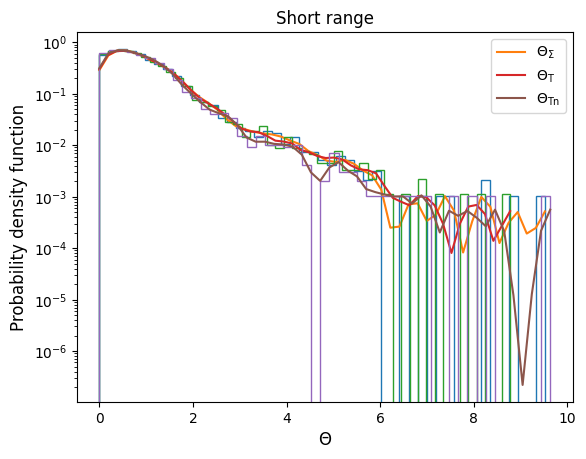

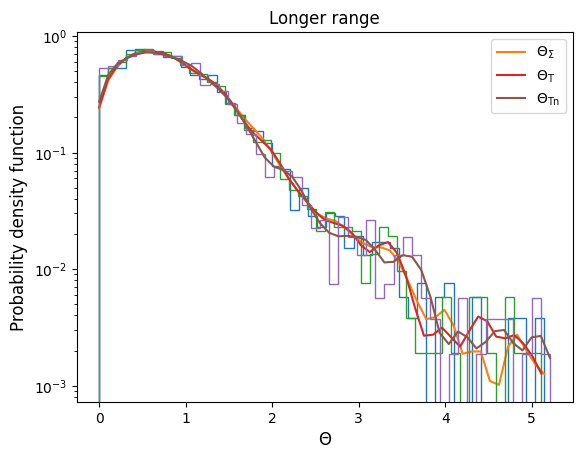

In [18]:
vis_measures(short_range, title = 'Short range')
vis_measures(long_range, title = 'Longer range')

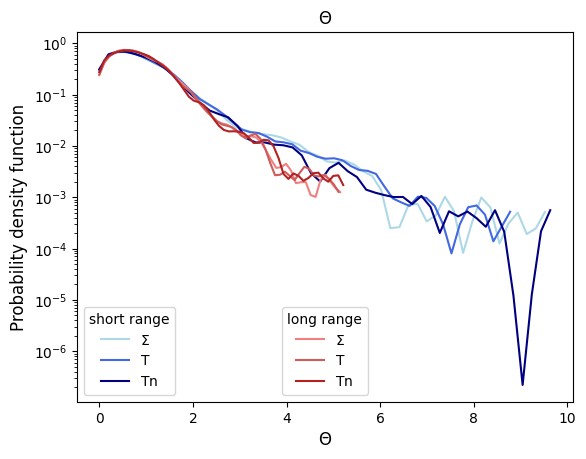

In [19]:
vis_measures2(short_range, long_range, title = '\Theta')

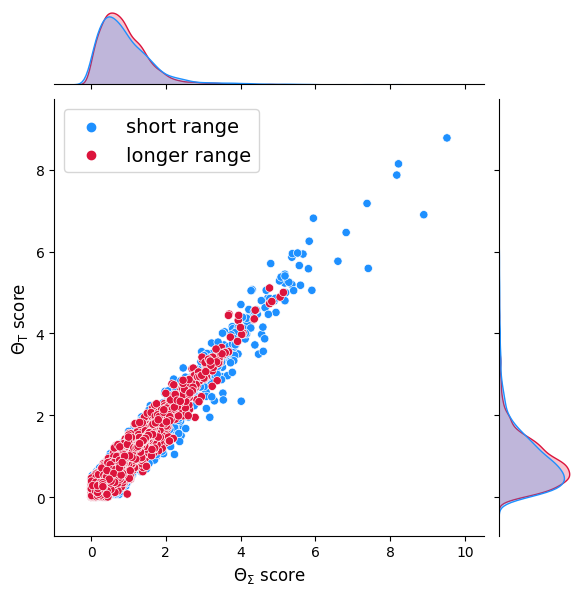

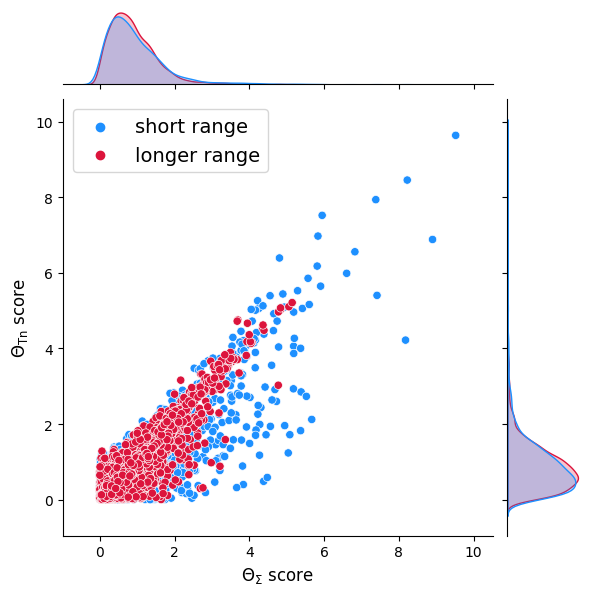

In [20]:
vis_corr_measures(short_range, long_range, ('short range', 'longer range'))

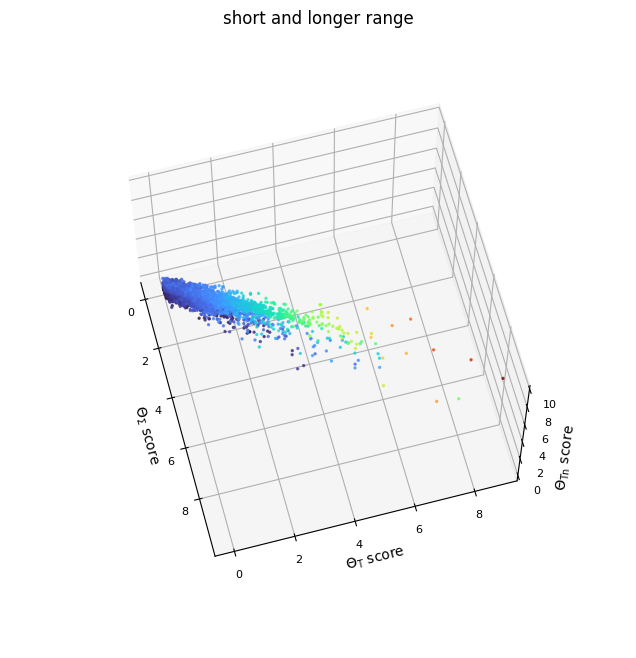

In [21]:
vis3d_corr_measures(short_range, long_range, 'short and longer range')

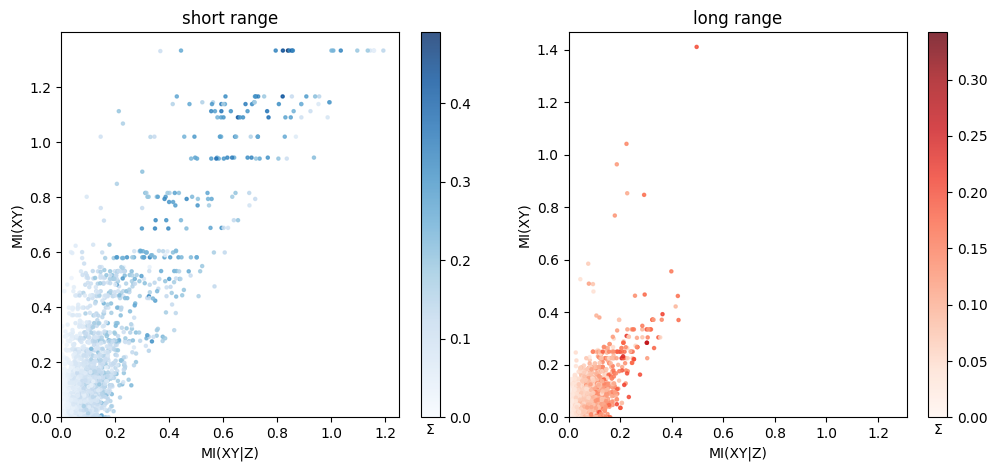

In [22]:
MI_MIC(short_range, long_range, 'Sigma', display = 1, label = ('short range', 'long range'))

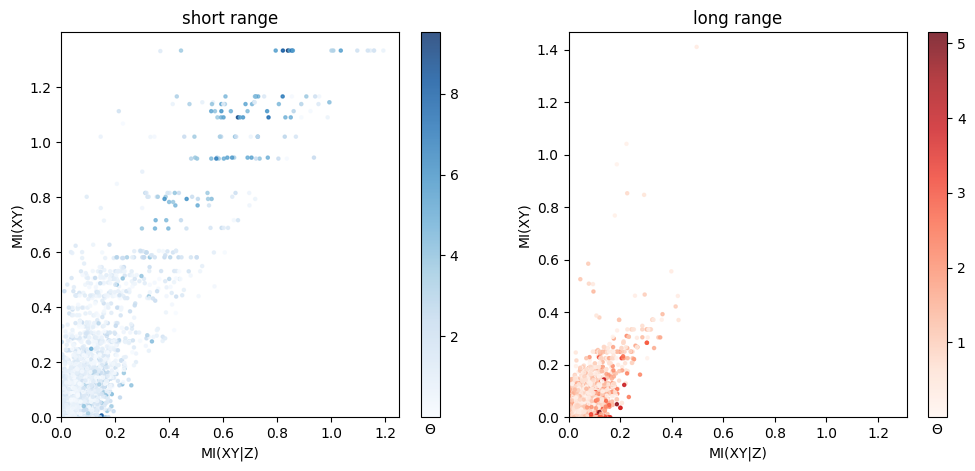

In [23]:
MI_MIC(short_range, long_range, 'Theta', display = 1, label = ('short range', 'long range'))

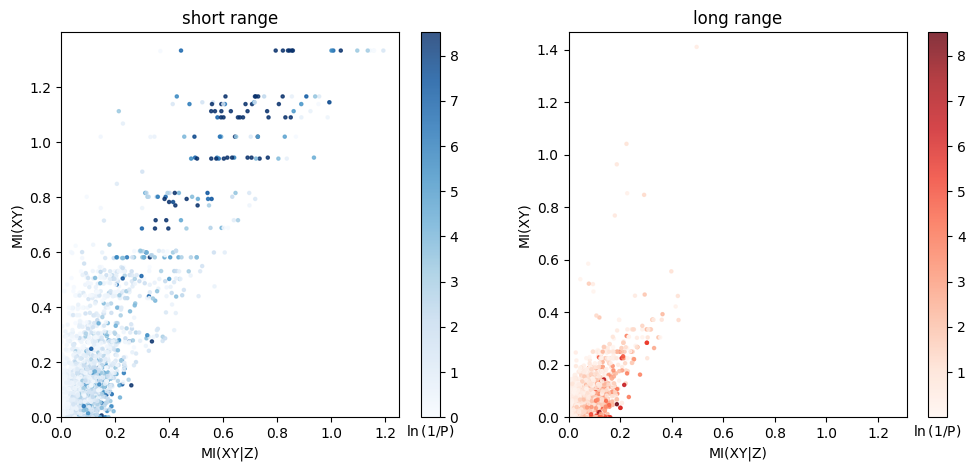

In [24]:
MI_MIC(short_range, long_range, 'P', display = 1, label = ('short range', 'long range'))

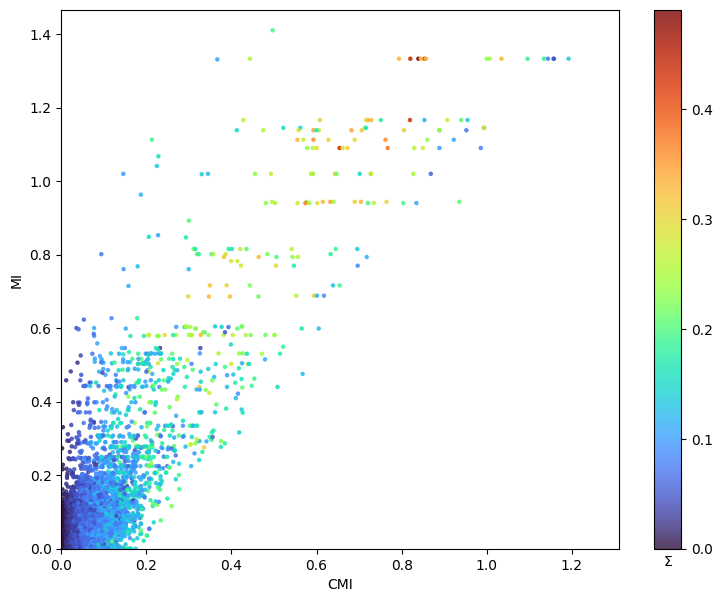

In [25]:
MI_MIC_merge(short_range, long_range, key = 'Sigma', display = 1, label = None)

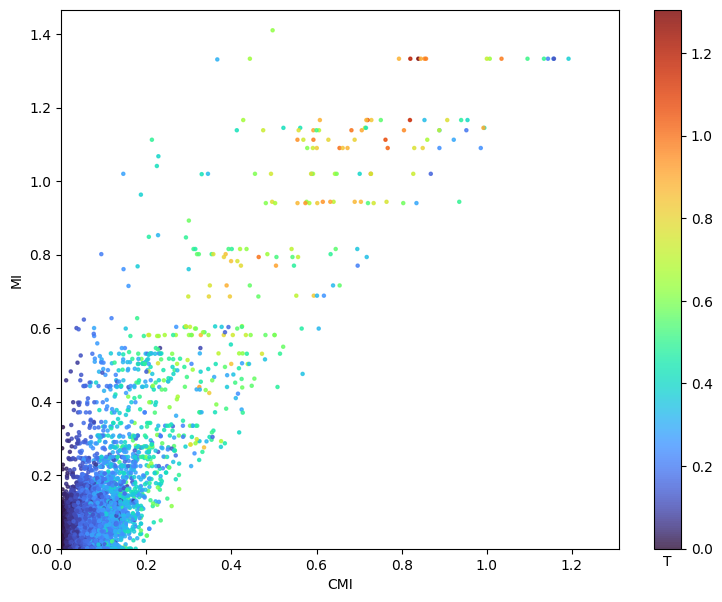

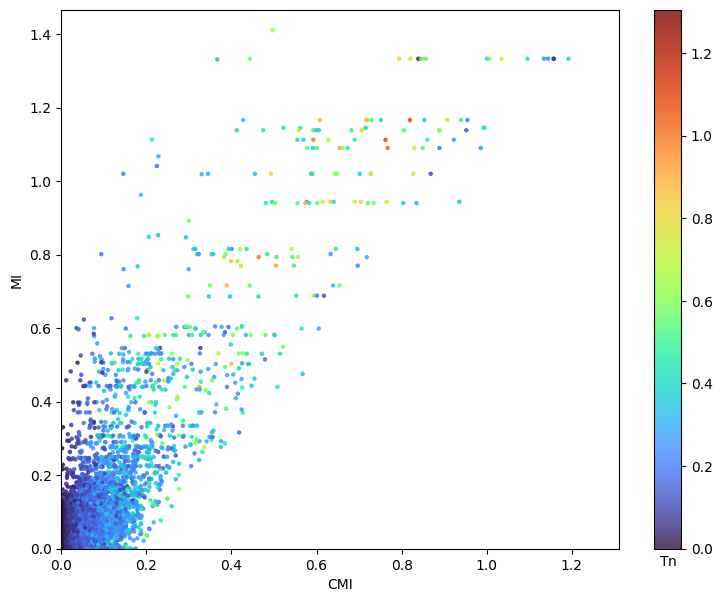

In [26]:
MI_MIC_merge(short_range, long_range, key = 'T', display = 1, label = None)
MI_MIC_merge(short_range, long_range, key = 'Tn', display = 1, label = None)

## Non triadic

Sigma, T, Tn 0.02966847112652267 0.07597343234399911 0.07597343234399911
Sigma_mean_null 0.04705454142811934
T_mean_null 0.11940799138699333
Tn_mean_null 0.11188114352646597
P 0.693 P_T 0.678 P_Tn 0.647
Theta 0.5781113306876141 Theta_T 0.5602659322676625 Theta_Tn 0.48840581354812157
4 1.7
4 1.7
0.1722453805665704 0.21692058783831317 0.693


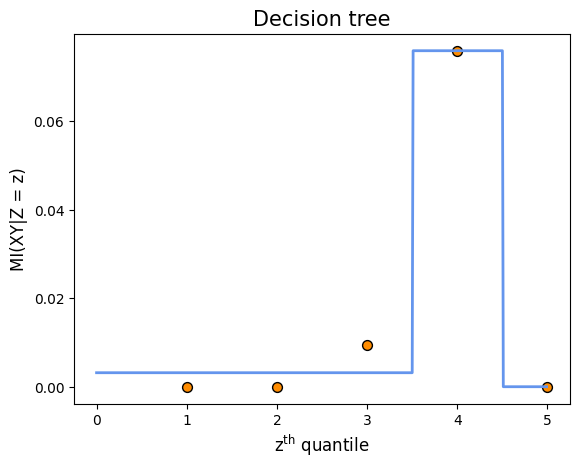

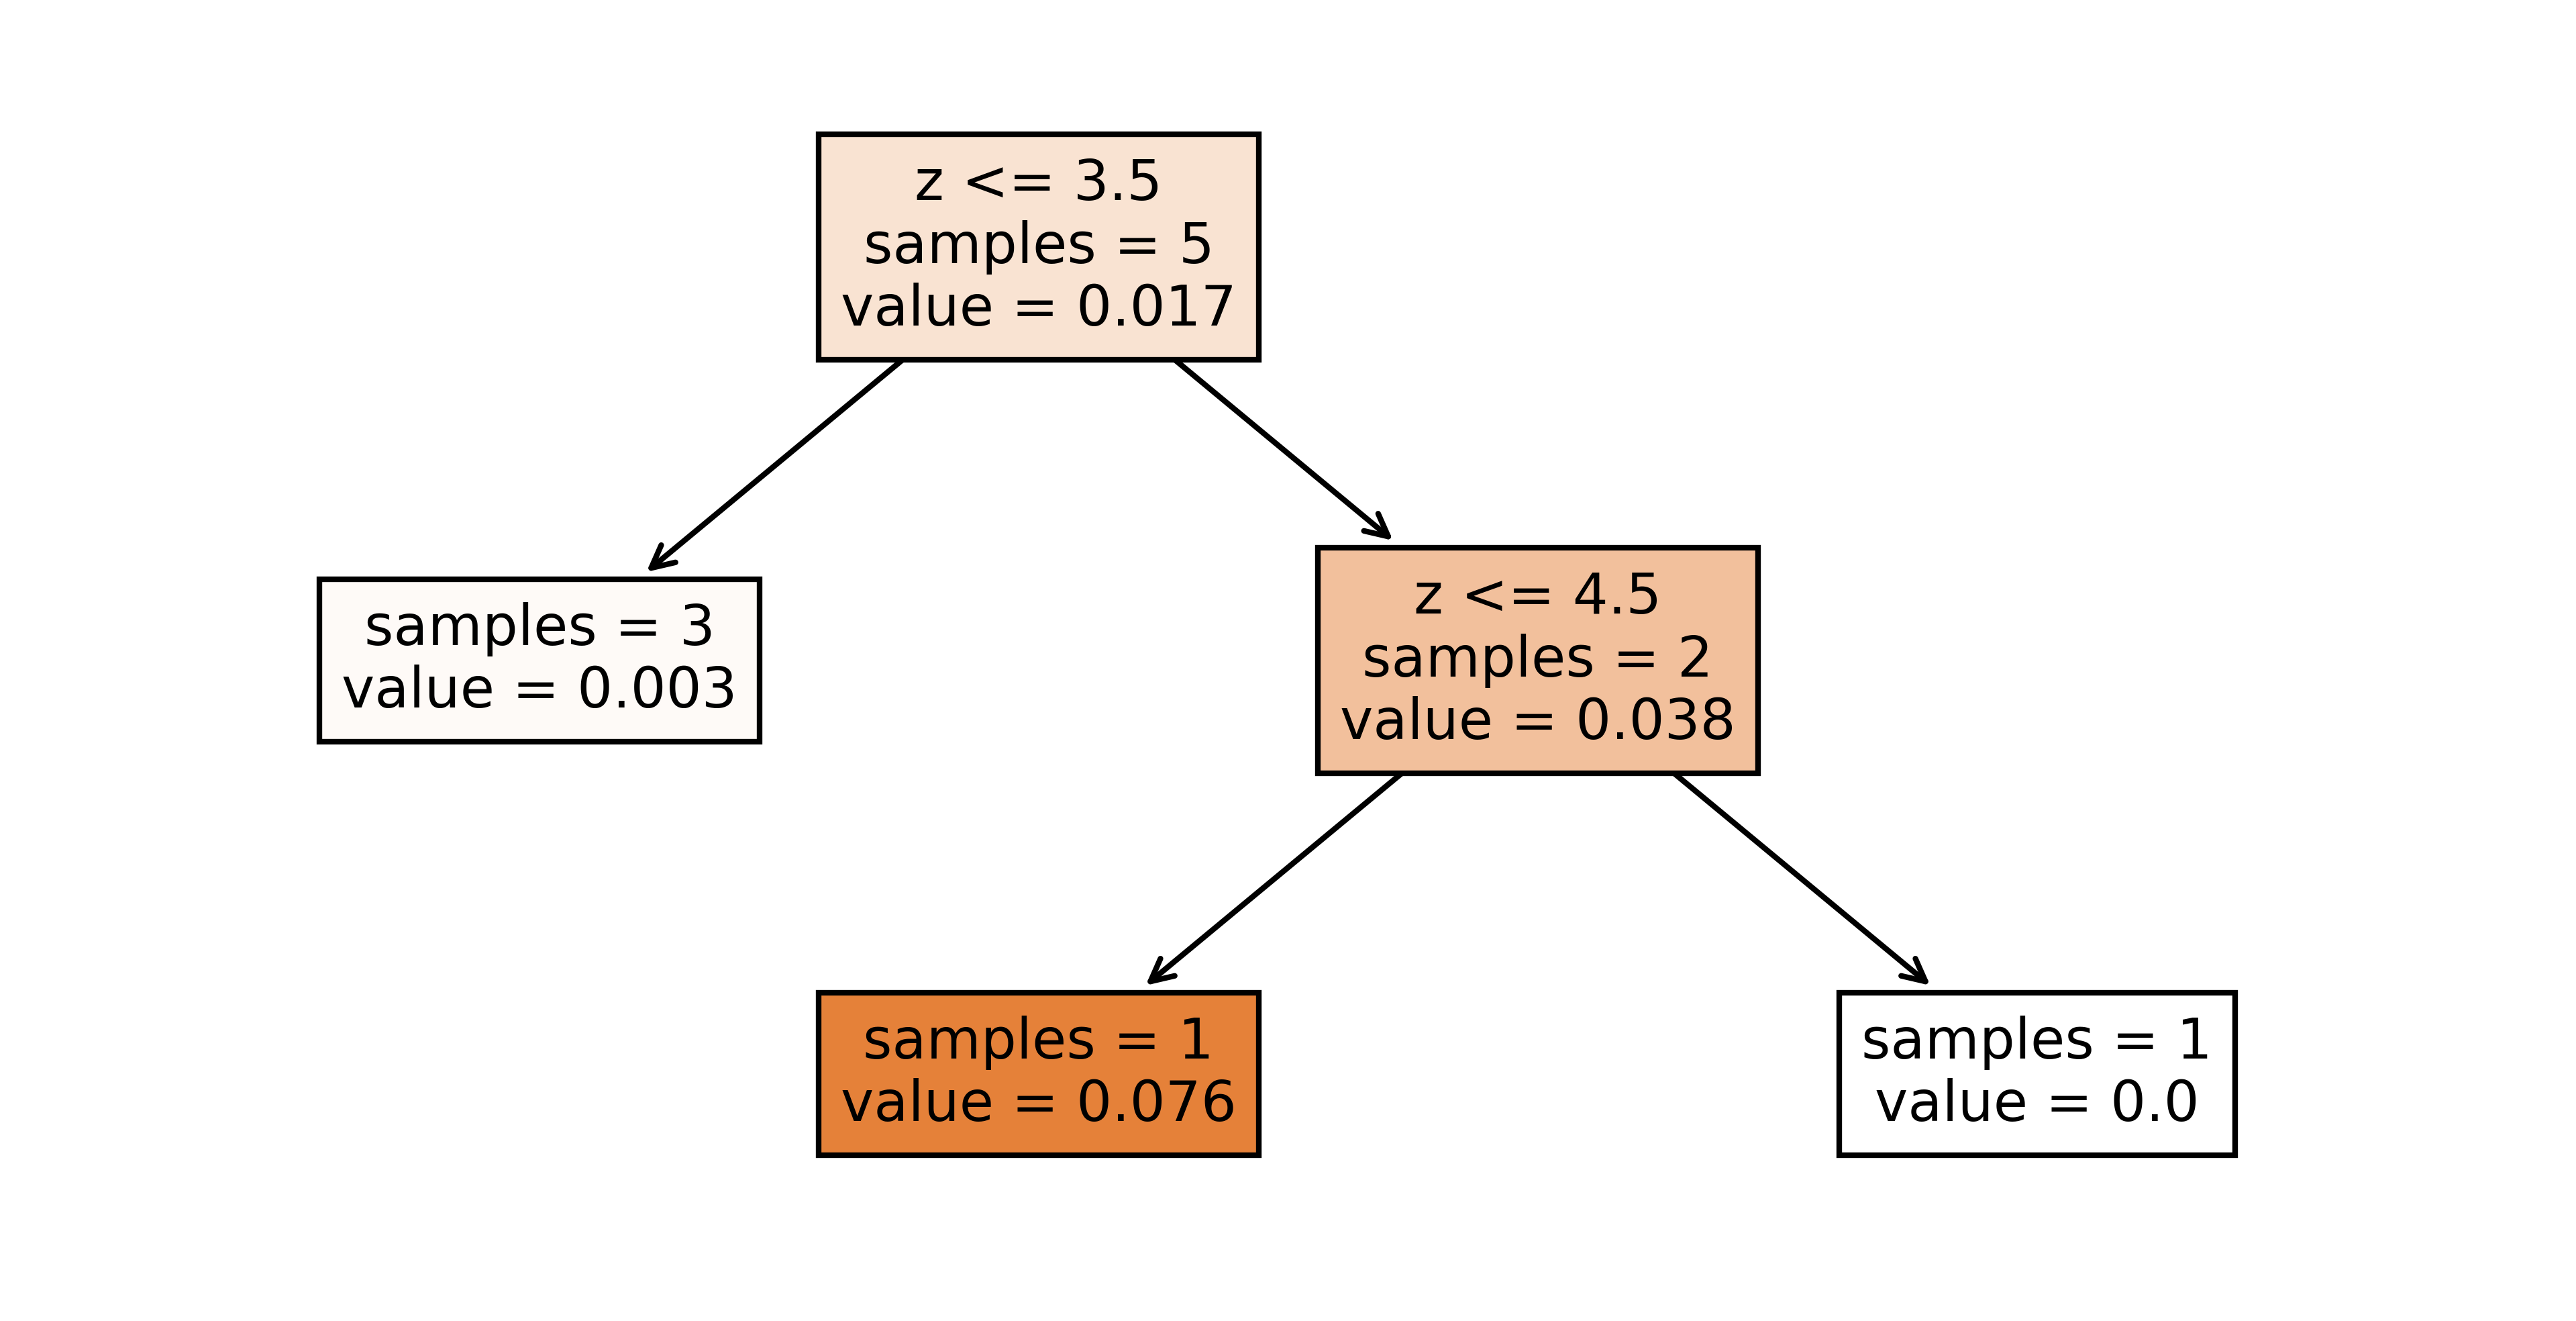

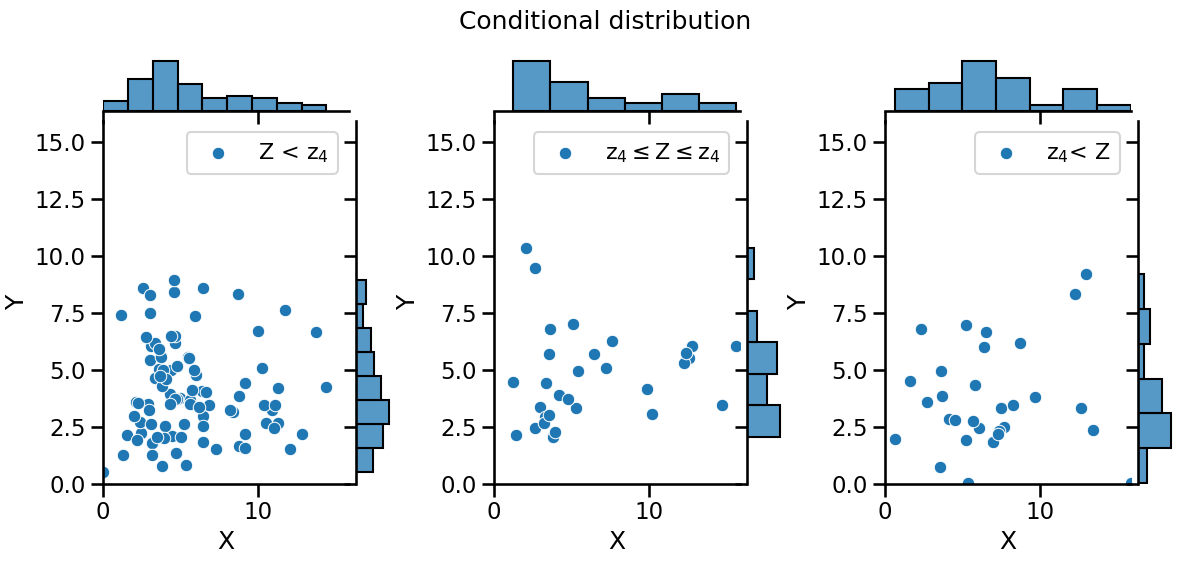

In [27]:
name_X = 'IRF6'
name_Y = 'NKX3-1'
name_Z = 'SRY'
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
timeseries = np.zeros((3,len(X)))
timeseries[0,:] = X
timeseries[1,:] = Y
timeseries[2,:] = Z
I = [1,2,3]
num = 5
tlen = len(X)
nrunmax = 1000
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, True, True)

x = range(1, num+1)
th1,th2,c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True)
I = [0,1,2]
visualisation_conditioned_val(timeseries, I, num, tlen, cond = [th1,th2])
print(np.sqrt(Sigma), np.sqrt(np.mean(Sigma_null_list)), P)

## Triadic monotonic

Sigma, T, Tn 0.43762528410580764 1.196219491386406 0.7216648365182827
Sigma_mean_null 0.13453526188563228
T_mean_null 0.37061039662321393
Tn_mean_null 0.31630794940196255
P 0.001 P_T 0.001 P_Tn 0.009
Theta 5.926380767974174 Theta_T 5.792878803163551 Theta_Tn 2.945520287277136
4 12.8
4 12.8
0.6615325268690933 0.3667904877251212 0.001


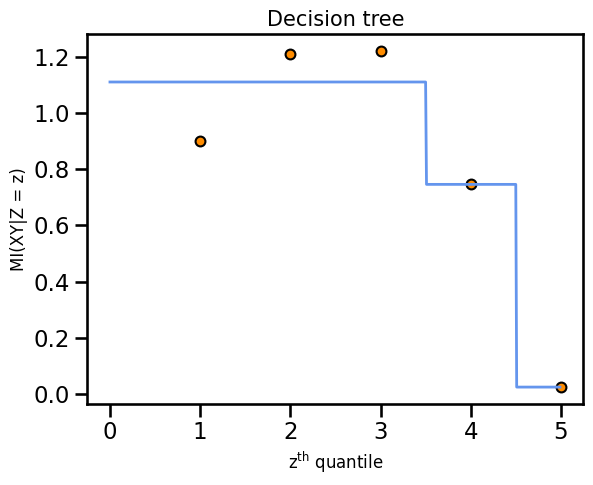

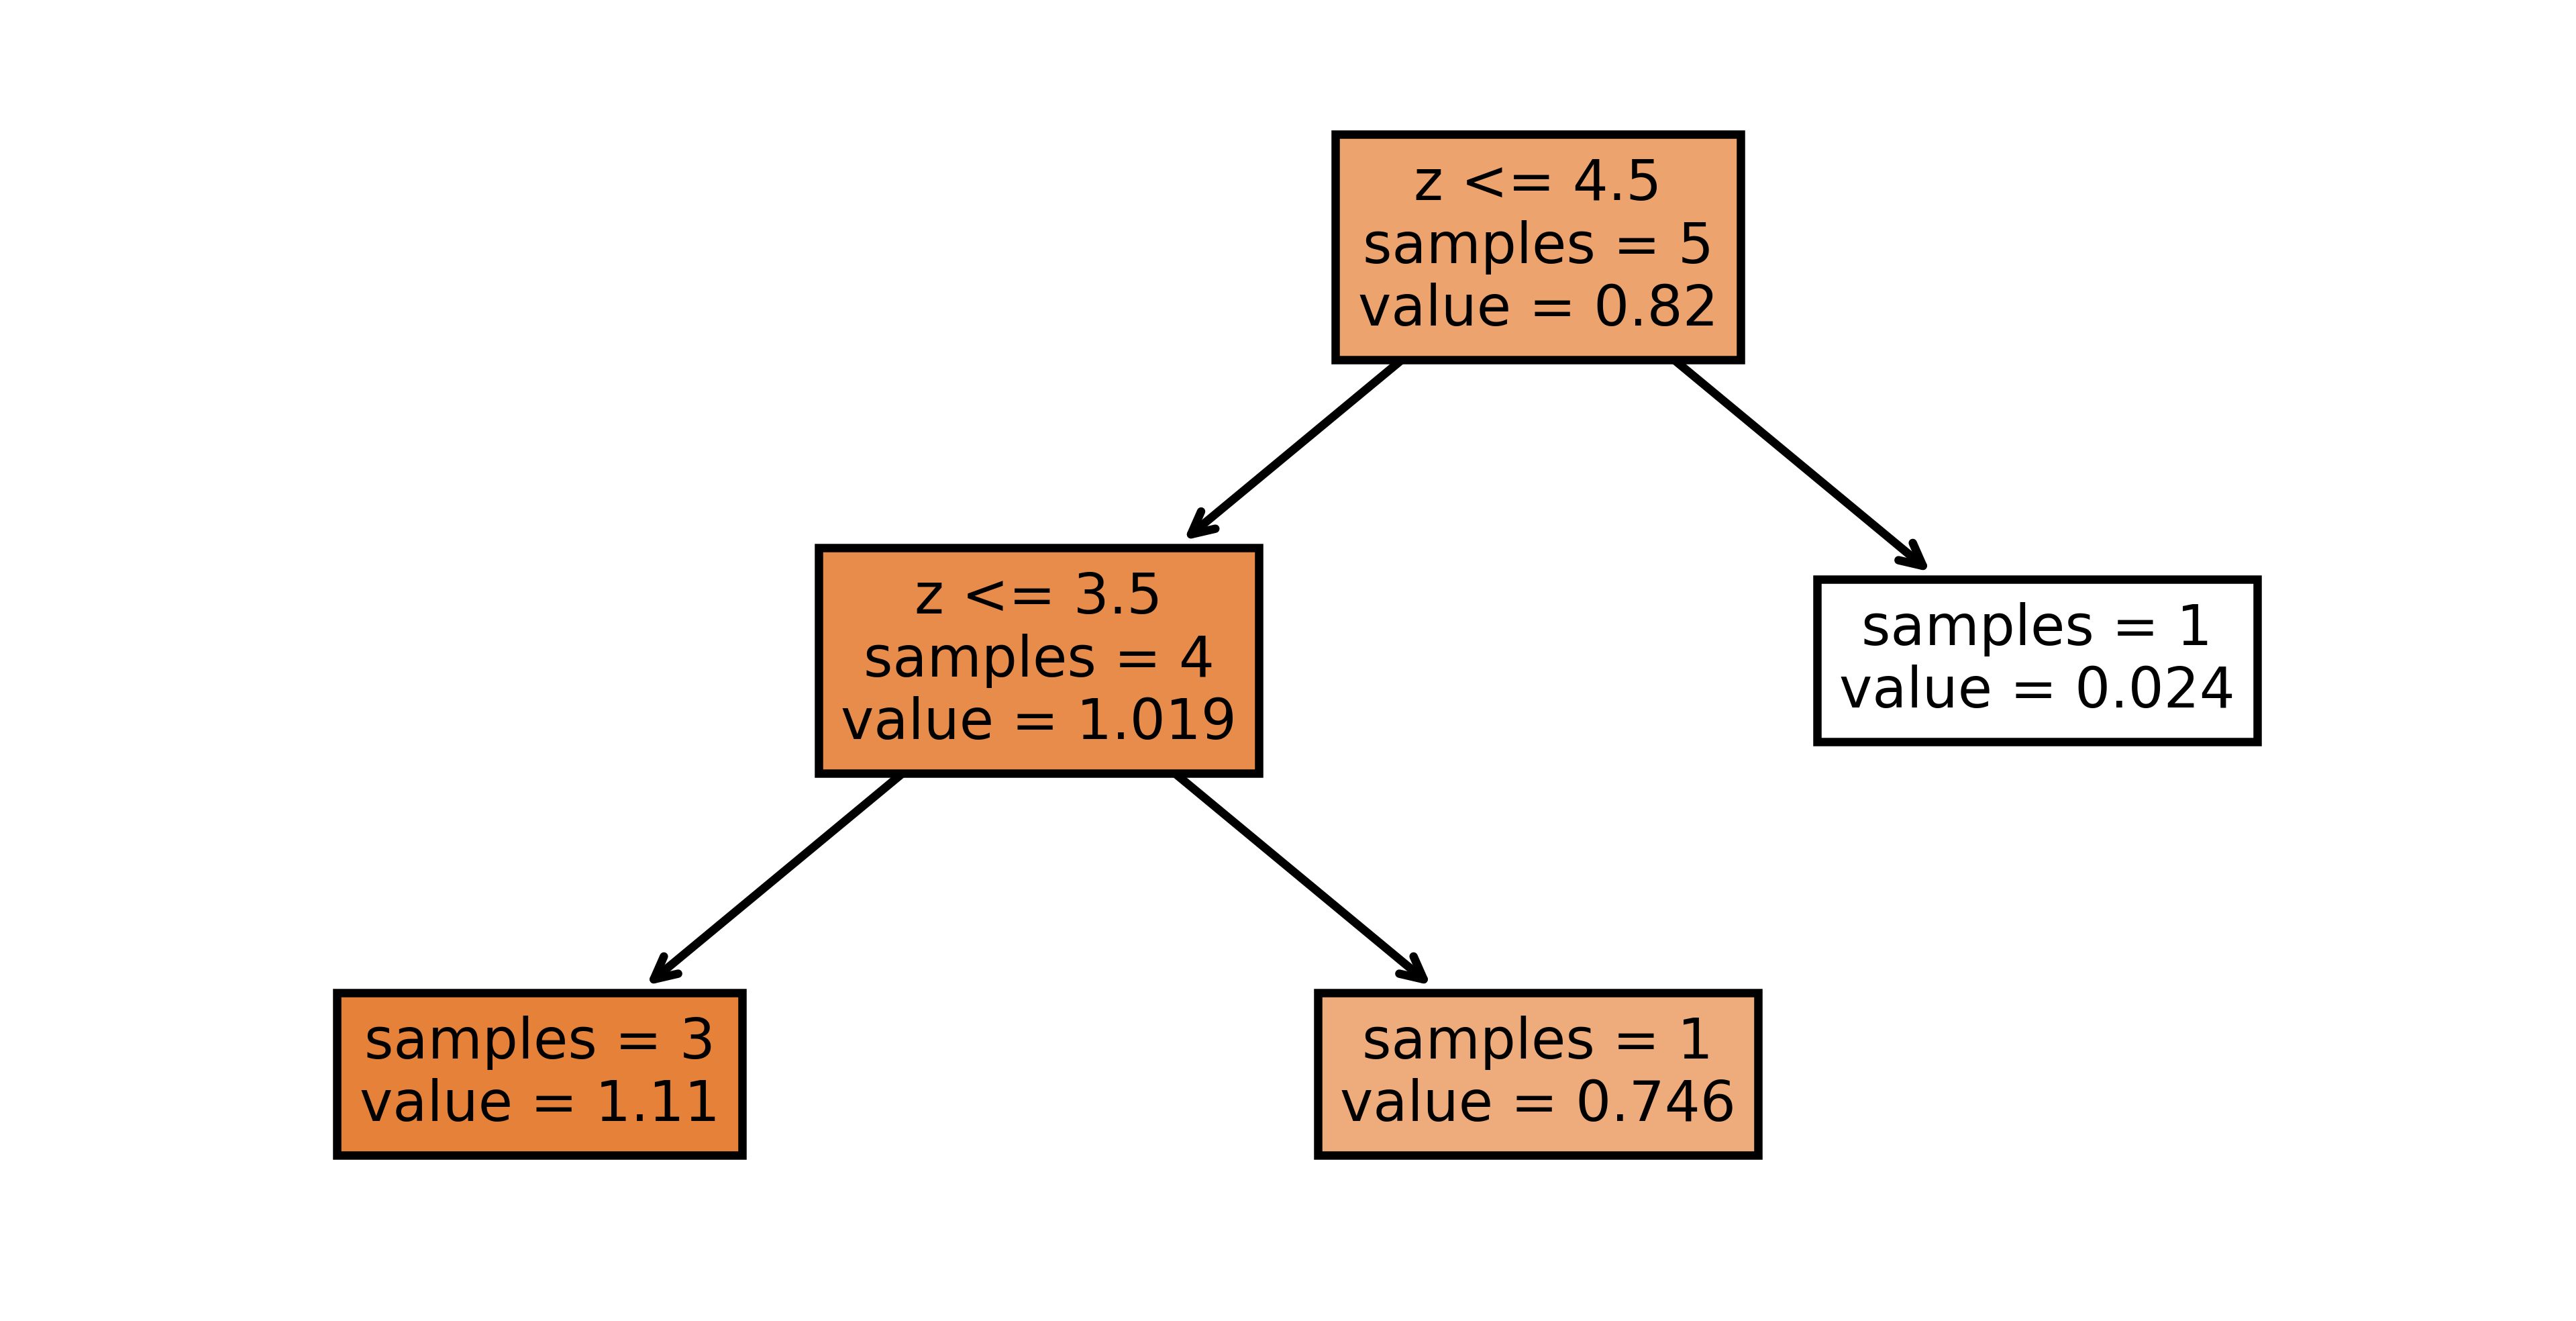

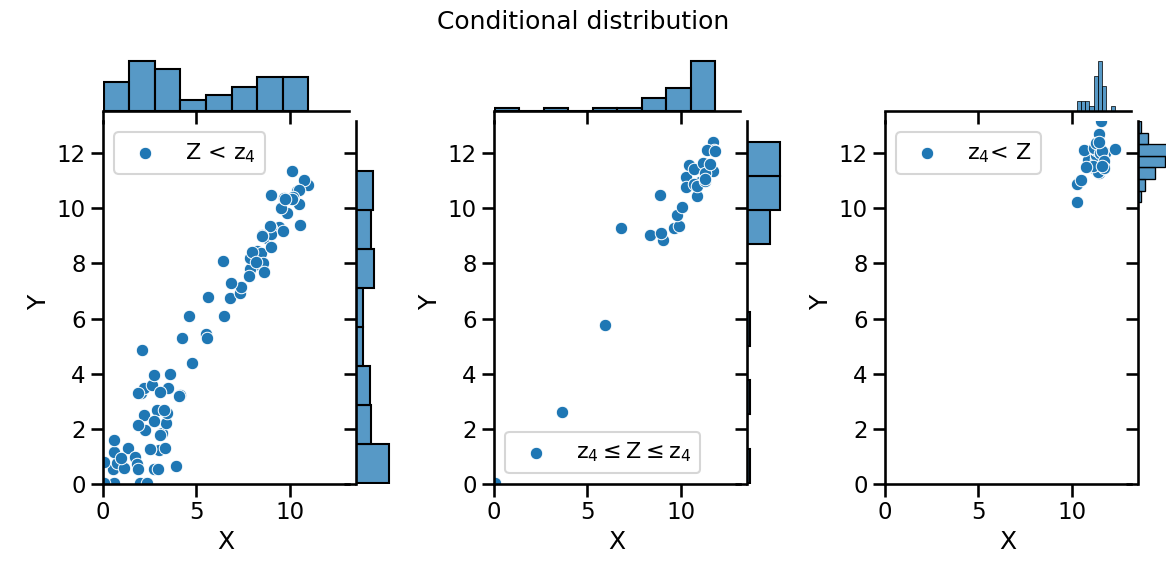

In [28]:
name_X = 'HOXA3'
name_Y = 'HOXA5'
name_Z = 'PBX3'
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
timeseries = np.zeros((3,len(X)))
timeseries[0,:] = X
timeseries[1,:] = Y
timeseries[2,:] = Z
I = [1,2,3]
num = 5
tlen = len(X)
nrunmax = 1000
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, True, True)

x = range(1, num+1)
th1,th2,c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True)
I = [0,1,2]
visualisation_conditioned_val(timeseries, I, num, tlen, cond = [th1,th2])
print(np.sqrt(Sigma), np.sqrt(np.mean(Sigma_null_list)), P)

Sigma, T, Tn 0.27099232544524793 0.8243270502603108 0.4489859214859213
Sigma_mean_null 0.1276719912487756
T_mean_null 0.35189821982257696
Tn_mean_null 0.3022540461419862
P 0.003 P_T 0.001 P_Tn 0.121
Theta 3.112478802568632 Theta_T 3.68861209312176 Theta_Tn 1.1670257728749422
2 5.3
4 7.2


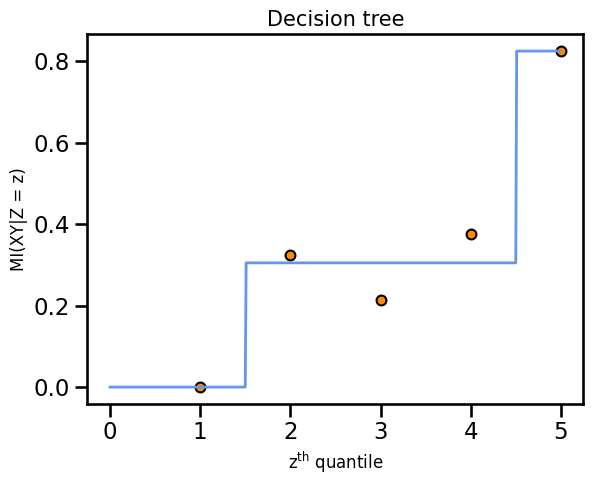

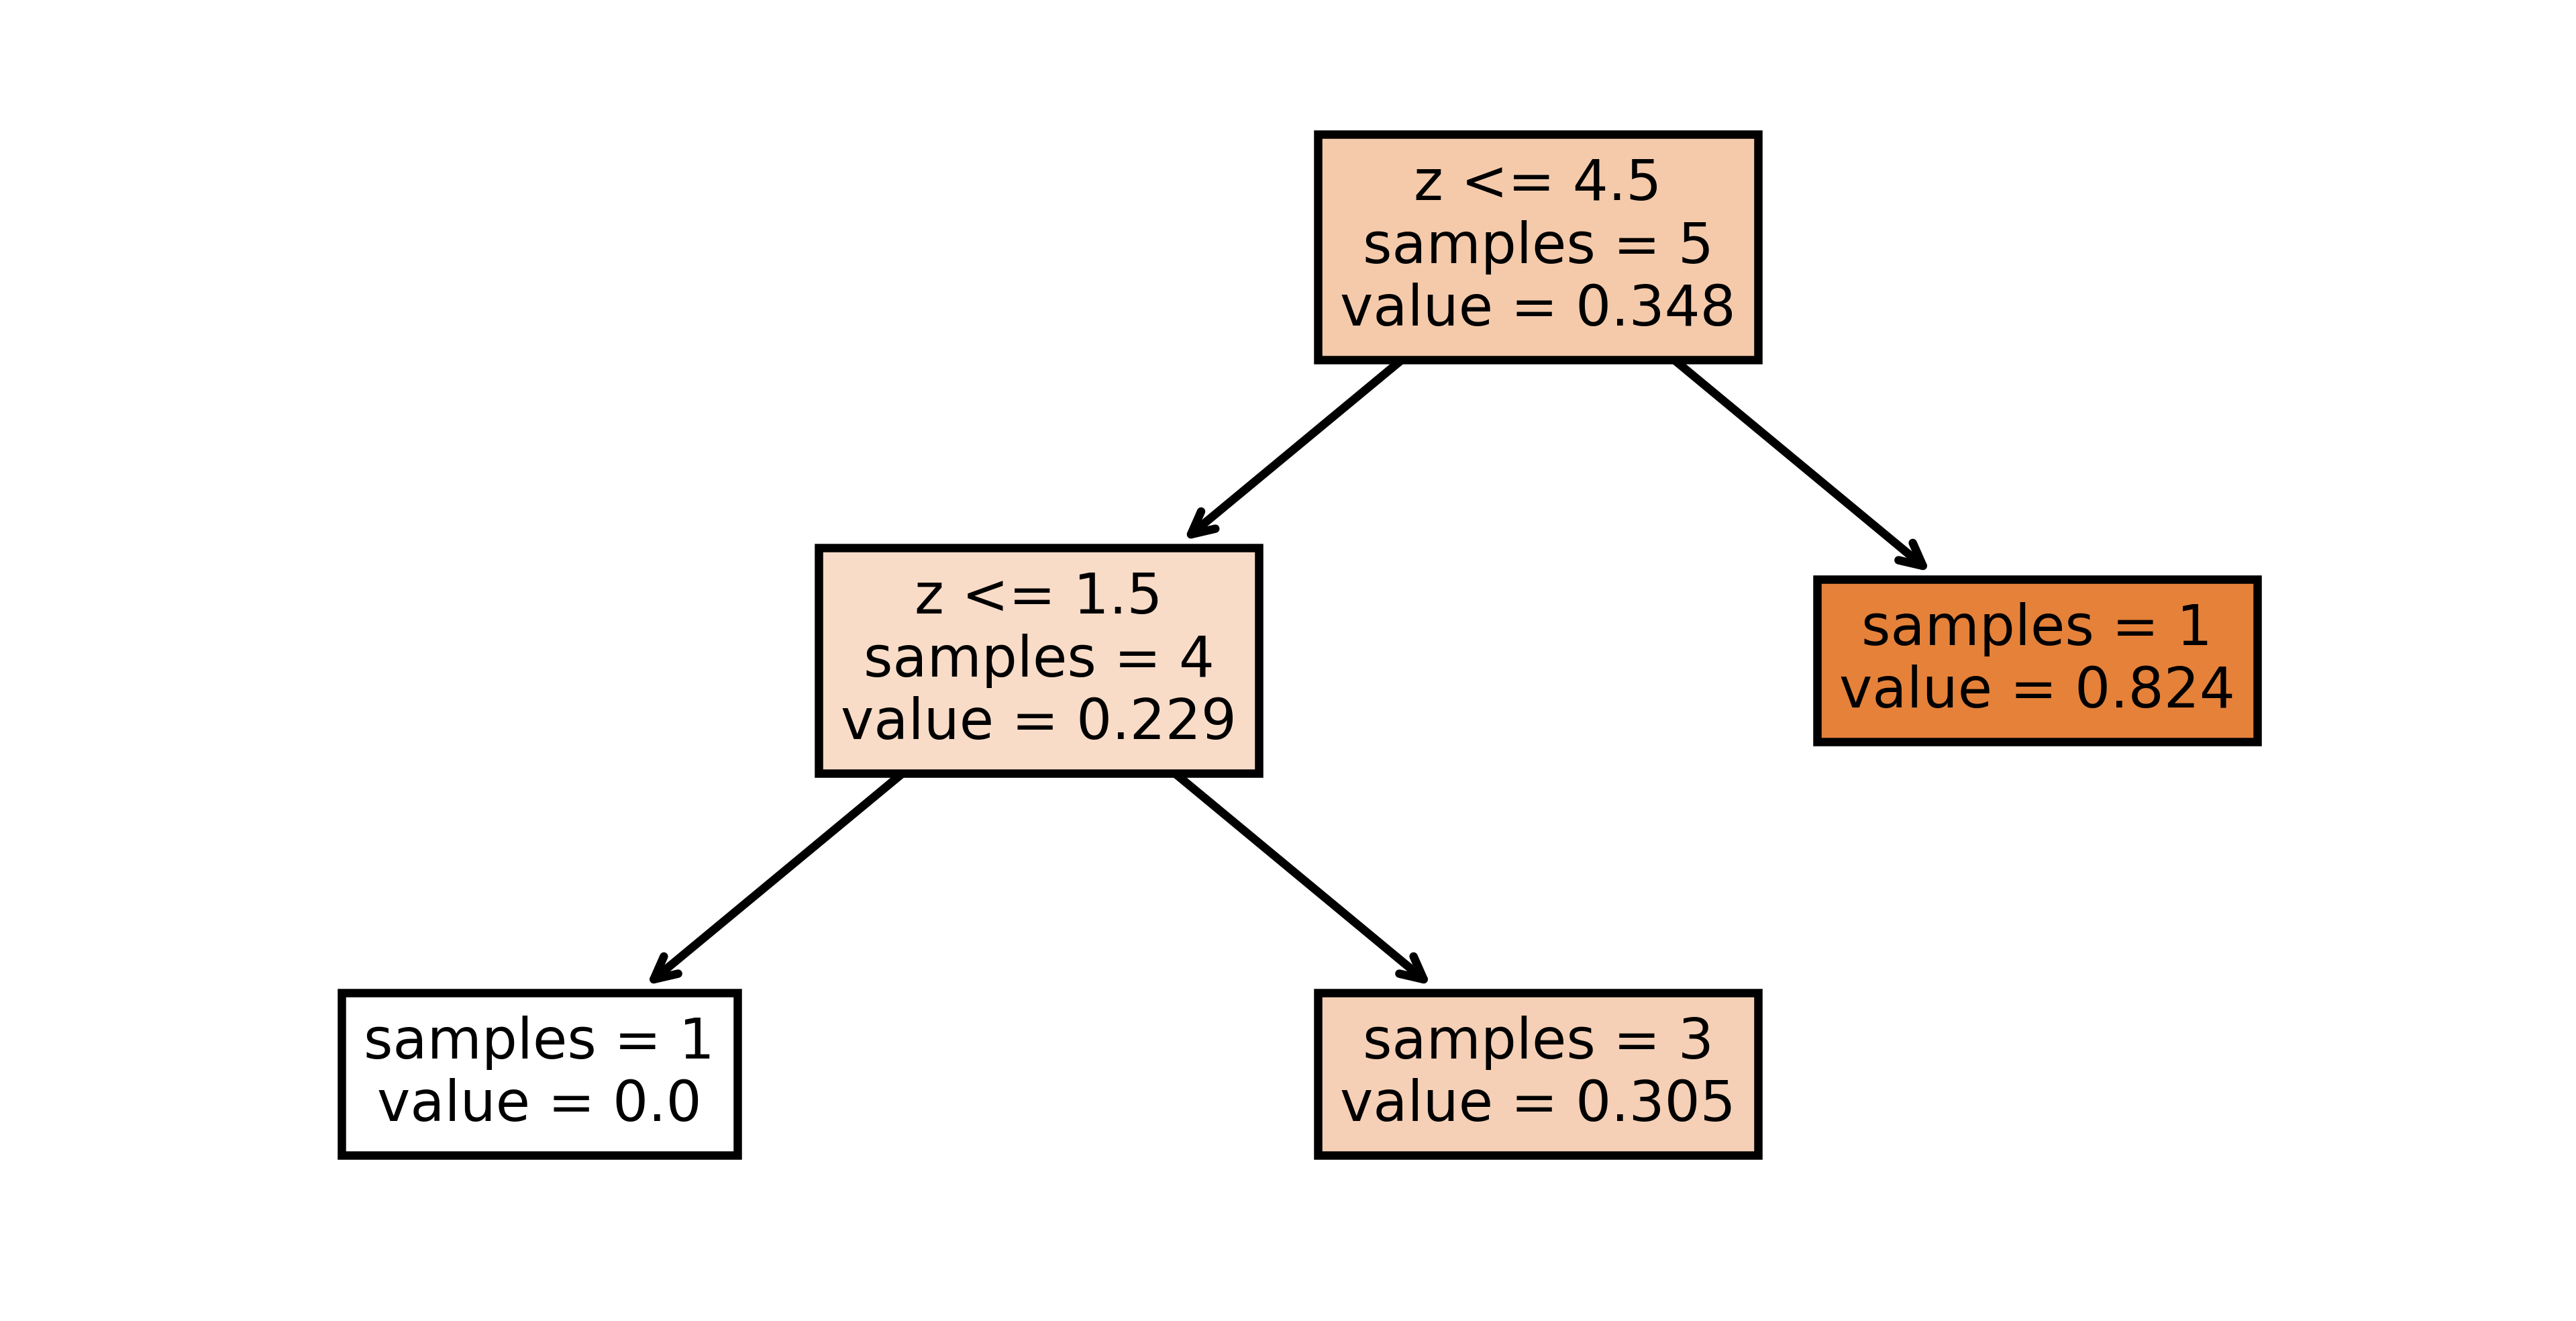

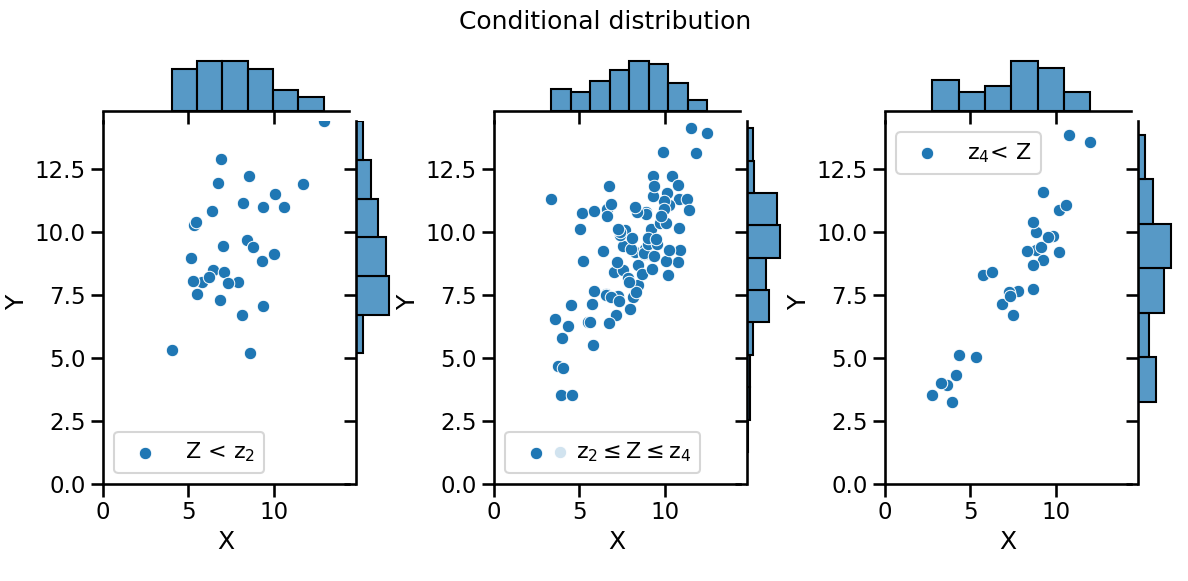

In [29]:
name_X = 'GATA1'
name_Y = 'TAL1'
name_Z = 'KLF5'
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
timeseries = np.zeros((3,len(X)))
timeseries[0,:] = X
timeseries[1,:] = Y
timeseries[2,:] = Z
I = [1,2,3]
num = 5
tlen = len(X)
nrunmax = 1000
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, True, True)
MI, MIz, MIC, Corr_Sigma, Sigma, T, Tn, MINDY, MI1, MI2 = ifc.mutual_information_analysis_continuous_extended(timeseries, [0,1,2], num, tlen)
x = range(1, num+1)
th1,th2,c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True, name=save_folder + '/' + 'good_decision_tree')
I = [0,1,2]
visualisation_conditioned_val(timeseries, I, num, tlen, name = save_folder + '/' + 'good', cond = [th1,th2])

## Triadic non-monotonic

Sigma, T, Tn 0.19606190562166442 0.541483121313441 0.4690547573565813
Sigma_mean_null 0.1000985687151809
T_mean_null 0.26971613996324223
Tn_mean_null 0.23392493824230476
P 0.016 P_T 0.016 P_Tn 0.03
Theta 2.5178109073618633 Theta_T 2.6035563625423577 Theta_Tn 2.310238354242468
0.44278878217685735 0.3163835784537195 0.016


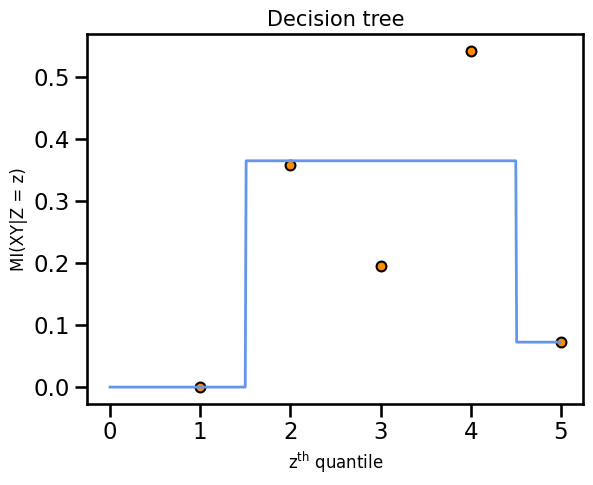

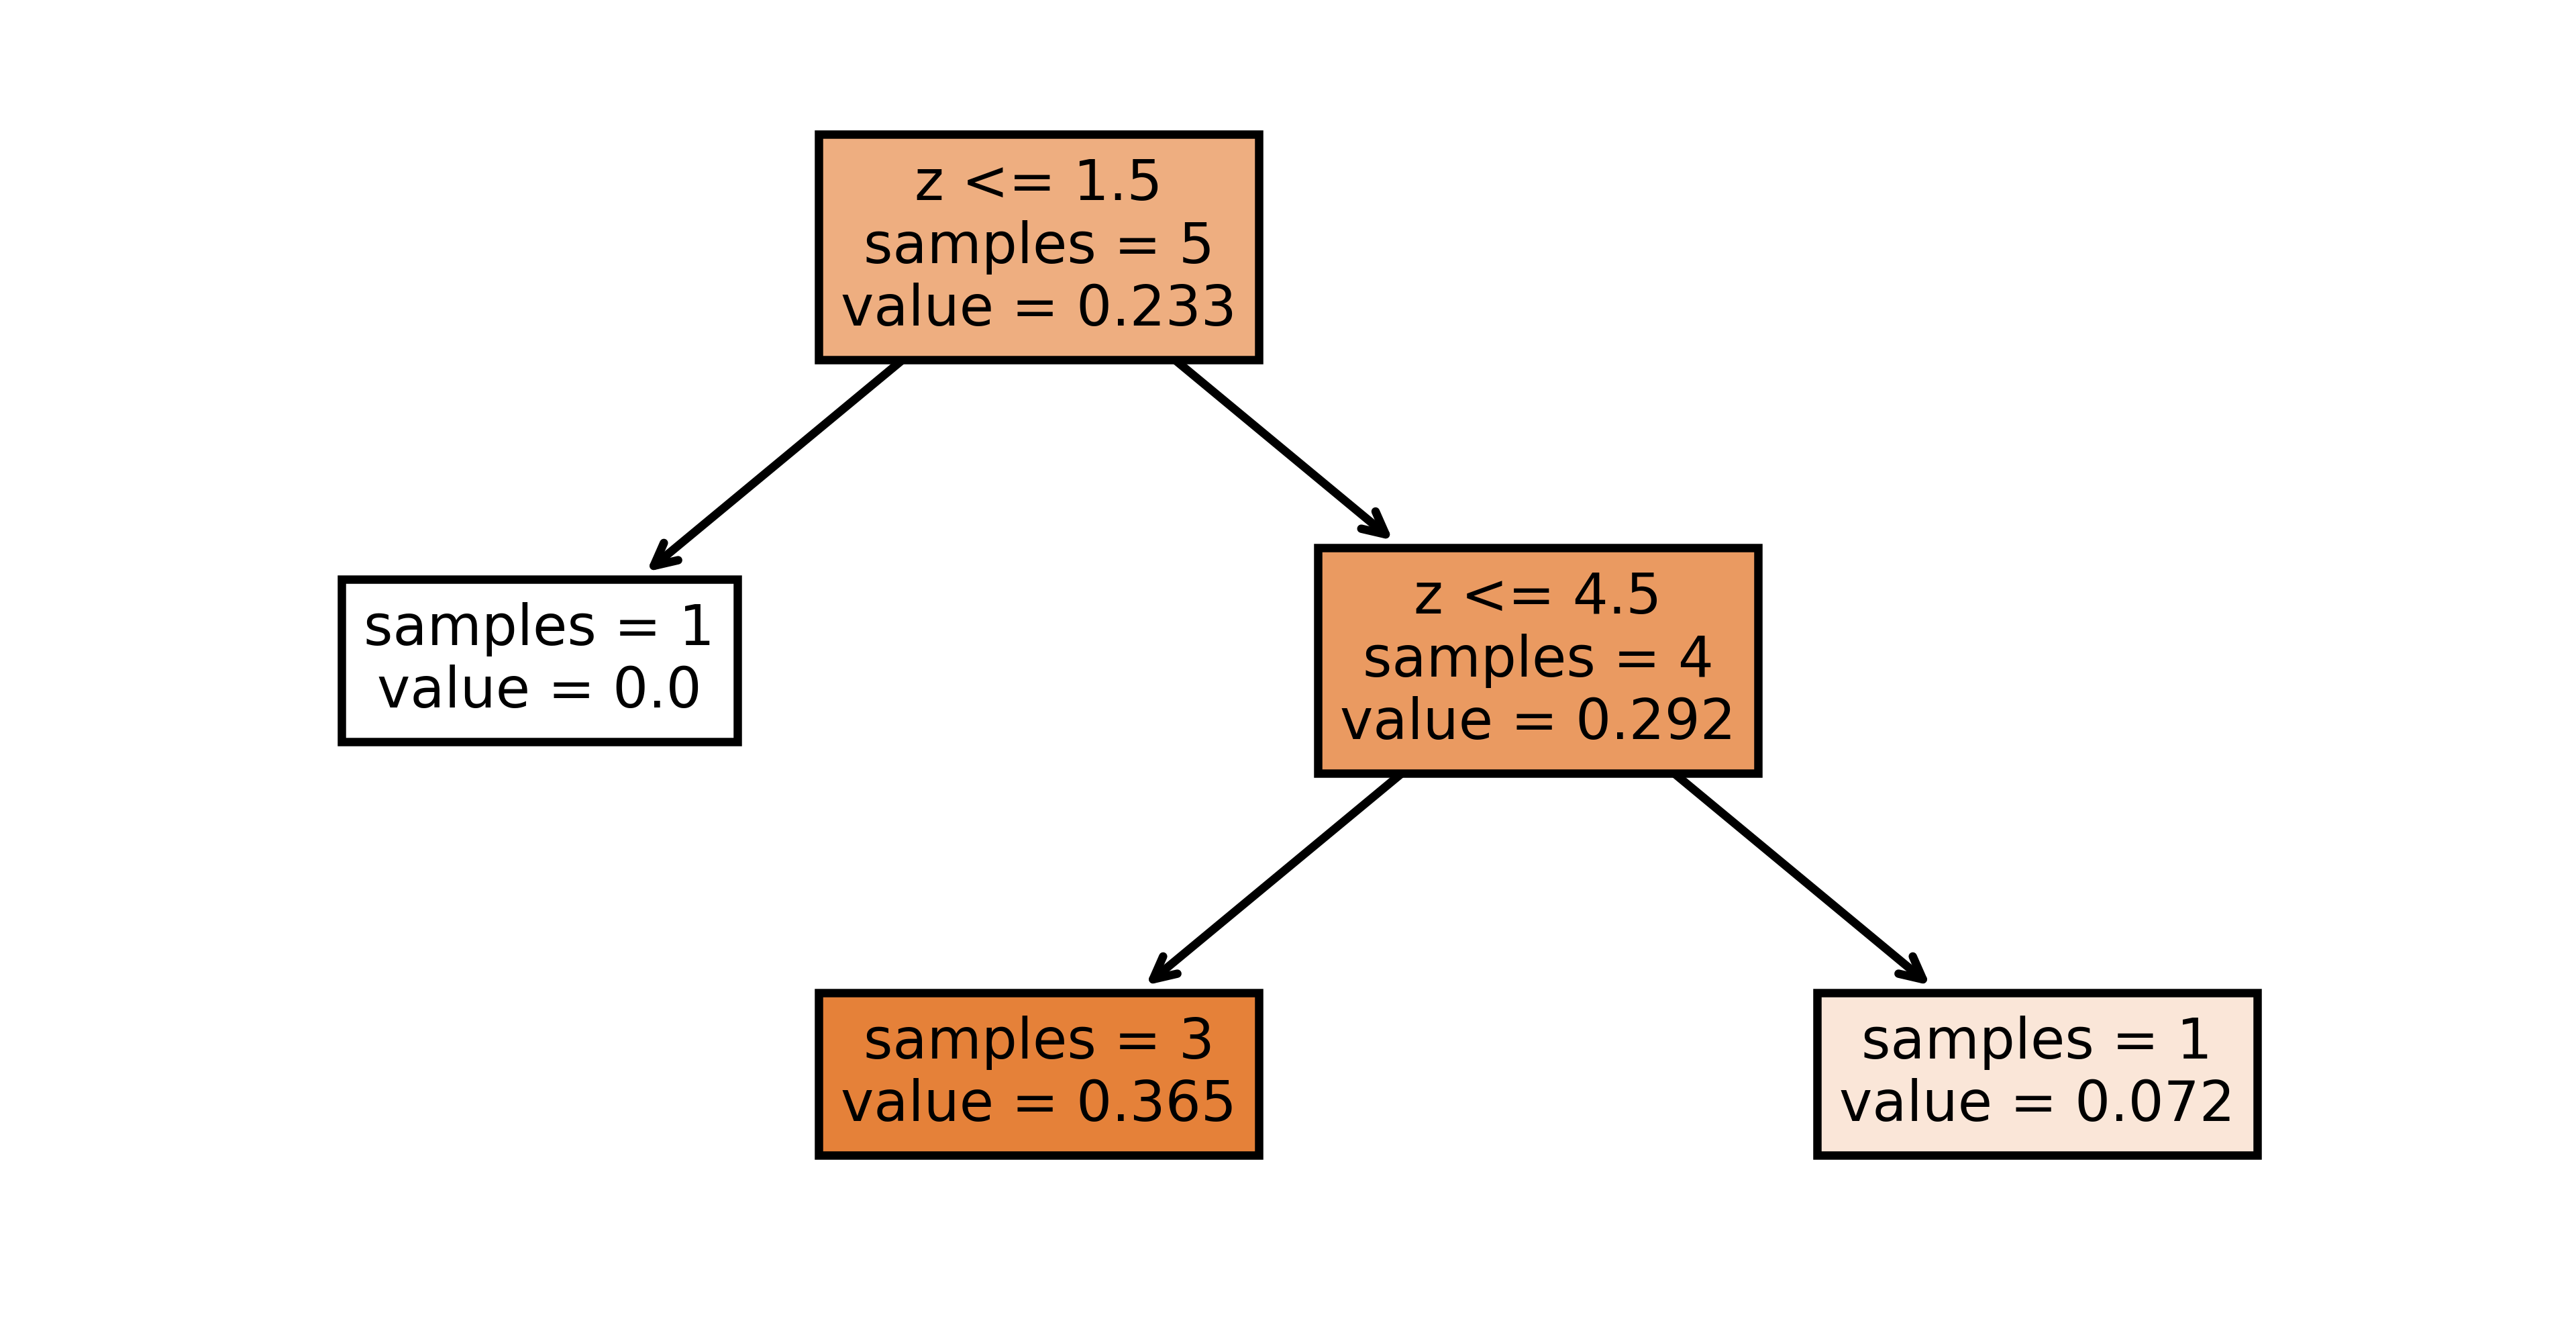

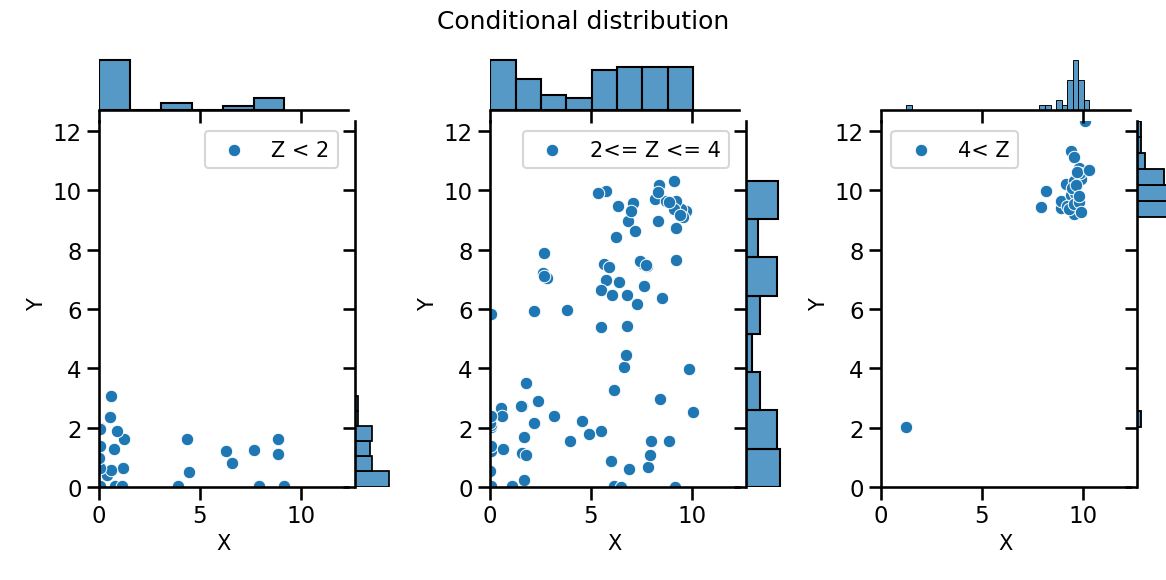

In [30]:
name_X = 'HOXA7'
name_Y = 'HOXB5'
name_Z = 'HOXB2'
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
timeseries = np.zeros((3,len(X)))
timeseries[0,:] = X
timeseries[1,:] = Y
timeseries[2,:] = Z
I = [1,2,3]
num = 5
tlen = len(X)
nrunmax = 1000
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, True, True)

x = range(1, num+1)
th1, th2, c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True, name=None)
I = [0,1,2]
visualisation_conditioned(timeseries, I, num, tlen, cond = [th1,th2])

print(np.sqrt(Sigma), np.sqrt(np.mean(Sigma_null_list)), P)

## 3. Distribution for an edge  <a class="anchor" id="section_3"></a> 

### 3.1. Short range  <a class="anchor" id="section_3_1"></a> 

In [31]:
edge_short_range_data = sorted(glob.glob('data/HOXB5_HOXB6/*'))

In [32]:
temp_edge_short_range_list = list()
for k in edge_short_range_data:
    temp2 = pd.read_csv(k, sep = '\t', index_col = 0, header = None)
    temp_edge_short_range_list.append(temp2)

final_temp_edge_short_range = pd.concat([temp_edge_short_range_list[i] for i in range(len(temp_edge_short_range_list))],axis=1)
temp_edge_short_range = final_temp_edge_short_range.T.reset_index(drop = True)
temp_edge_short_range['P'] = temp_edge_short_range['P'].astype(float)

In [33]:
temp_edge_short_range

0       reg  node1  node2                  MI                 MIC  \
0       AHR  HOXB5  HOXB6  1.1664079793536422  0.9584375851502577   
1      ALX1  HOXB5  HOXB6  1.1664079793536422  1.0210699555032163   
2      ALX3  HOXB5  HOXB6  1.1664079793536422  0.9849675024007631   
3      ALX4  HOXB5  HOXB6  1.1664079793536422   0.986488398171659   
4        AR  HOXB5  HOXB6  1.1664079793536422  0.8874053581180306   
..      ...    ...    ...                 ...                 ...   
634    SPIC  HOXB5  HOXB6  1.1664079793536422  0.8583307687640296   
635  TFAP2A  HOXB5  HOXB6  1.1664079793536422  1.0060912860245468   
636   ZBTB1  HOXB5  HOXB6  1.1664079793536422  0.9720999135625863   
637  ZBTB7C  HOXB5  HOXB6  1.1664079793536422  1.0835223364555973   
638  ZNF282  HOXB5  HOXB6  1.1664079793536422  1.0678072552405162   

0                  Theta              Theta_T             Theta_Tn  \
0     0.6661993934320491   0.5827848443674346  0.45560248732210207   
1      1.032944210748584   1.2161399138298374   0.8823059882698456   
2     0.5540158331235402    0.794021031871713   1.2369739676560756   
3    0.07751729958106812  0.22986434579286102   0.2040441646879953   
4     0.5425357768109049   0.7022117927440308  0.46395511721935484   
..                   ...                  ...                  ...   
634   0.4342050912474996   0.6179001984049958   1.0650886661474719   
635  0.29541548639135345   0.3357314306780716   0.1423608304269842   
636   0.6532749017273656   0.5413816439704527  0.48563453362824577   
637   0.7276117552074138   0.6630525332982625  0.46020560604253447   
638   1.0613091561390684   0.8782329904339088   0.9164530950809058   

0                  Sigma           Sigma_null                    T  \
0    0.09311180050254138  0.12221446242469401  0.26531783031783096   
1     0.1701314944641895  0.12405203104674334    0.495123025123025   
2     0.1484052333025038  0.12420482596271525  0.44219456469456464   
3    0.11963283477935616  0.12297458670942488   0.3117100954600962   
4    0.14628292785479458  0.12276241220548971   0.4250012025012022   
..                   ...                  ...                  ...   
634   0.1422563035660274  0.12327346312539435  0.41753848003848004   
635  0.11068686771888309   0.1236923434391666    0.300189625189625   
636  0.09408383386193778  0.12320636578232712   0.2727096052096054   
637  0.09026445683076728  0.12226358555159227  0.25611268361268347   
638  0.17055530066917848  0.12380611964632064   0.4519315869315865   

0                 T_null                   Tn              Tn_null       P  \
0     0.3378597788481965  0.23324111074111054   0.2865972837048622  0.7356   
1     0.3426217073763447  0.39698773448773506   0.2908315483250242  0.1584   
2     0.3438361581247619  0.44219456469456464   0.2930684627686717  0.2826   
3    0.33974098545274994   0.3117100954600962   0.2878735760332407  0.5100   
4      0.339072049052184  0.23482961482961495   0.2892352558224046  0.2842   
..                   ...                  ...                  ...     ...   
634   0.3411634390460151  0.41753848003848004  0.28984681311620863  0.3240   
635  0.34189914558341905  0.27476273726273726    0.291818001033974  0.5874   
636  0.34091275913756364  0.23106615606615666  0.28965649072518795  0.7266   
637  0.33897619791878103  0.23313529063529037   0.2882983913798894  0.7538   
638  0.34263912691603254   0.3993377918377923   0.2903401344294942  0.1504   

0       P_T    P_Tn  
0    0.7068  0.6412  
1    0.1168  0.1874  
2    0.2044  0.1114  
3    0.5666   0.384  
4    0.2352  0.6426  
..      ...     ...  
634  0.2636  0.1466  
635  0.5996  0.5148  
636  0.6814  0.6552  
637  0.7304  0.6442  
638   0.189  0.1742  

[639 rows x 17 columns]

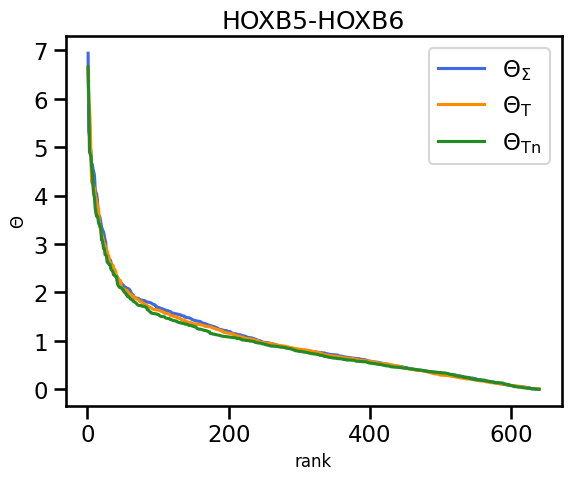

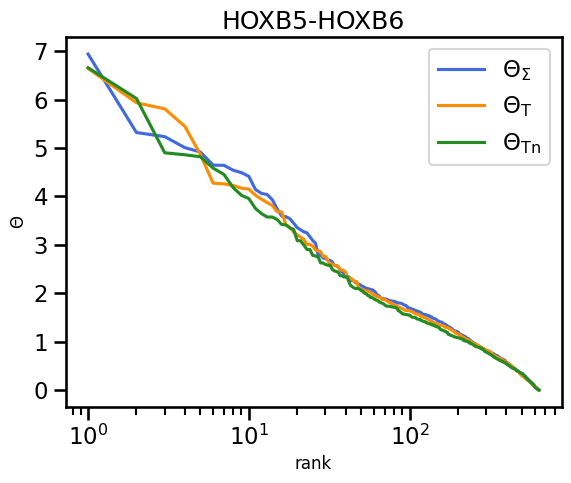

In [34]:
name = 'HOXB5-HOXB6'
temp_edge_short_range[['Theta', 'Theta_T', 'Theta_Tn']] = temp_edge_short_range[['Theta', 'Theta_T', 'Theta_Tn']].astype(float)
X1 = temp_edge_short_range.sort_values(by = 'Theta', ascending = False)['Theta'].values
X2 = temp_edge_short_range.sort_values(by = 'Theta_T', ascending = False)['Theta_T'].values
X3 = temp_edge_short_range.sort_values(by = 'Theta_Tn', ascending = False)['Theta_Tn'].values

density = sp.stats.gaussian_kde(X1)
n, x, _ = plt.hist(X1, bins = np.linspace(0, np.max(X1), 50), histtype=u'step', density=True)  
plt.plot(x, density(x), label = '$\mathregular{\Theta_\Sigma}$', color = 'royalblue')

density = sp.stats.gaussian_kde(X2)
n, x, _ = plt.hist(X2, bins = np.linspace(0, np.max(X2), 50), histtype=u'step', density=True)  
plt.plot(x, density(x), label = '$\mathregular{\Theta_T}$', color = 'darkorange')

density = sp.stats.gaussian_kde(X3)
n, x, _ = plt.hist(X3, bins = np.linspace(0, np.max(X3), 50), histtype=u'step', density=True)  
plt.plot(x, density(x), label = '$\mathregular{\Theta_{Tn}}$', color = 'forestgreen')

plt.xlabel('$\mathregular{\Theta}$', fontsize=12)
plt.ylabel('Probability density function', fontsize=12)
plt.title(name)
plt.legend()
plt.savefig(save_folder + '/' + 'edge_score1.png', format = 'png', dpi = 600)
plt.close()

plt.plot(np.arange(1,len(X1)+1), X1, label = '$\mathregular{\Theta_\Sigma}$', color = 'royalblue')
plt.plot(np.arange(1,len(X2)+1), X2, label = '$\mathregular{\Theta_T}$', color = 'darkorange')  
plt.plot(np.arange(1,len(X3)+1), X3, label = '$\mathregular{\Theta_{Tn}}$', color = 'forestgreen') 
plt.xlabel('rank', fontsize=12)
plt.ylabel('$\mathregular{\Theta}$', fontsize=12)
plt.title(name)
plt.legend()
plt.savefig(save_folder + '/' + 'edge_score2.png', format = 'png', dpi = 600)
plt.show()

plt.plot(np.arange(1,len(X1)+1), X1, label = '$\mathregular{\Theta_\Sigma}$', color = 'royalblue')
plt.plot(np.arange(1,len(X2)+1), X2, label = '$\mathregular{\Theta_T}$', color = 'darkorange')  
plt.plot(np.arange(1,len(X3)+1), X3, label = '$\mathregular{\Theta_{Tn}}$', color = 'forestgreen') 
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('rank', fontsize=12)
plt.ylabel('$\mathregular{\Theta}$', fontsize=12)
plt.title(name)
plt.legend()
plt.savefig(save_folder + '/' + 'edge_score3.png', format = 'png', dpi = 600)
plt.show()


### 4. Visualisation of triadic network  <a class="anchor" id="section_4"></a> 

In [35]:
from triaction.triadic_vis import triadic_network_vis_from_data_and_graph

sub_triadic = pd.concat([short_range[short_range['P']<0.001], long_range[long_range['P']<0.001]]).reset_index()
sub_sub_triadic = sub_triadic.sort_values(by='Theta', ascending=False).reset_index()
sub_sub_triadic = sub_sub_triadic[0:10]

set_nodes = set(sub_sub_triadic['reg']).union(set(sub_sub_triadic['node1'])).union(set(sub_sub_triadic['node2']))
graph_ppi.remove_edges_from(list(nx.selfloop_edges(graph_ppi)))
sub_graph = nx.Graph(graph_ppi.subgraph(list(set_nodes)))

sub_final = sub_triadic[sub_triadic['node1'].isin(set_nodes)]
sub_final = sub_final[sub_final['node2'].isin(set_nodes)]
sub_final = sub_final[sub_final['reg'].isin(set_nodes)]
sub_final = sub_final.reset_index(drop=True)
top = len(sub_final)

In [36]:
Corr_Sigma_list = list()
for k in range(len(sub_final)):
    name_X = sub_final['node1'].iloc[k]
    name_Y = sub_final['node2'].iloc[k]
    name_Z = sub_final['reg'].iloc[k]
    X = np.array(gene_expression.T[name_X])
    Y = np.array(gene_expression.T[name_Y])
    Z = np.array(gene_expression.T[name_Z])
    timeseries = np.zeros((3,len(X)))
    timeseries[0,:] = X
    timeseries[1,:] = Y
    timeseries[2,:] = Z
    num = 5
    tlen = len(X)
    I = [0,1,2]
    MI, MIz, MIC, Corr_Sigma, Sigma, T, Tn, MINDY, MI1, MI2 = ifc.mutual_information_analysis_continuous_extended(timeseries, I, num, tlen)
    Corr_Sigma_list.append(Corr_Sigma)

sub_final['corr'] = pd.Series(Corr_Sigma_list).astype(float)

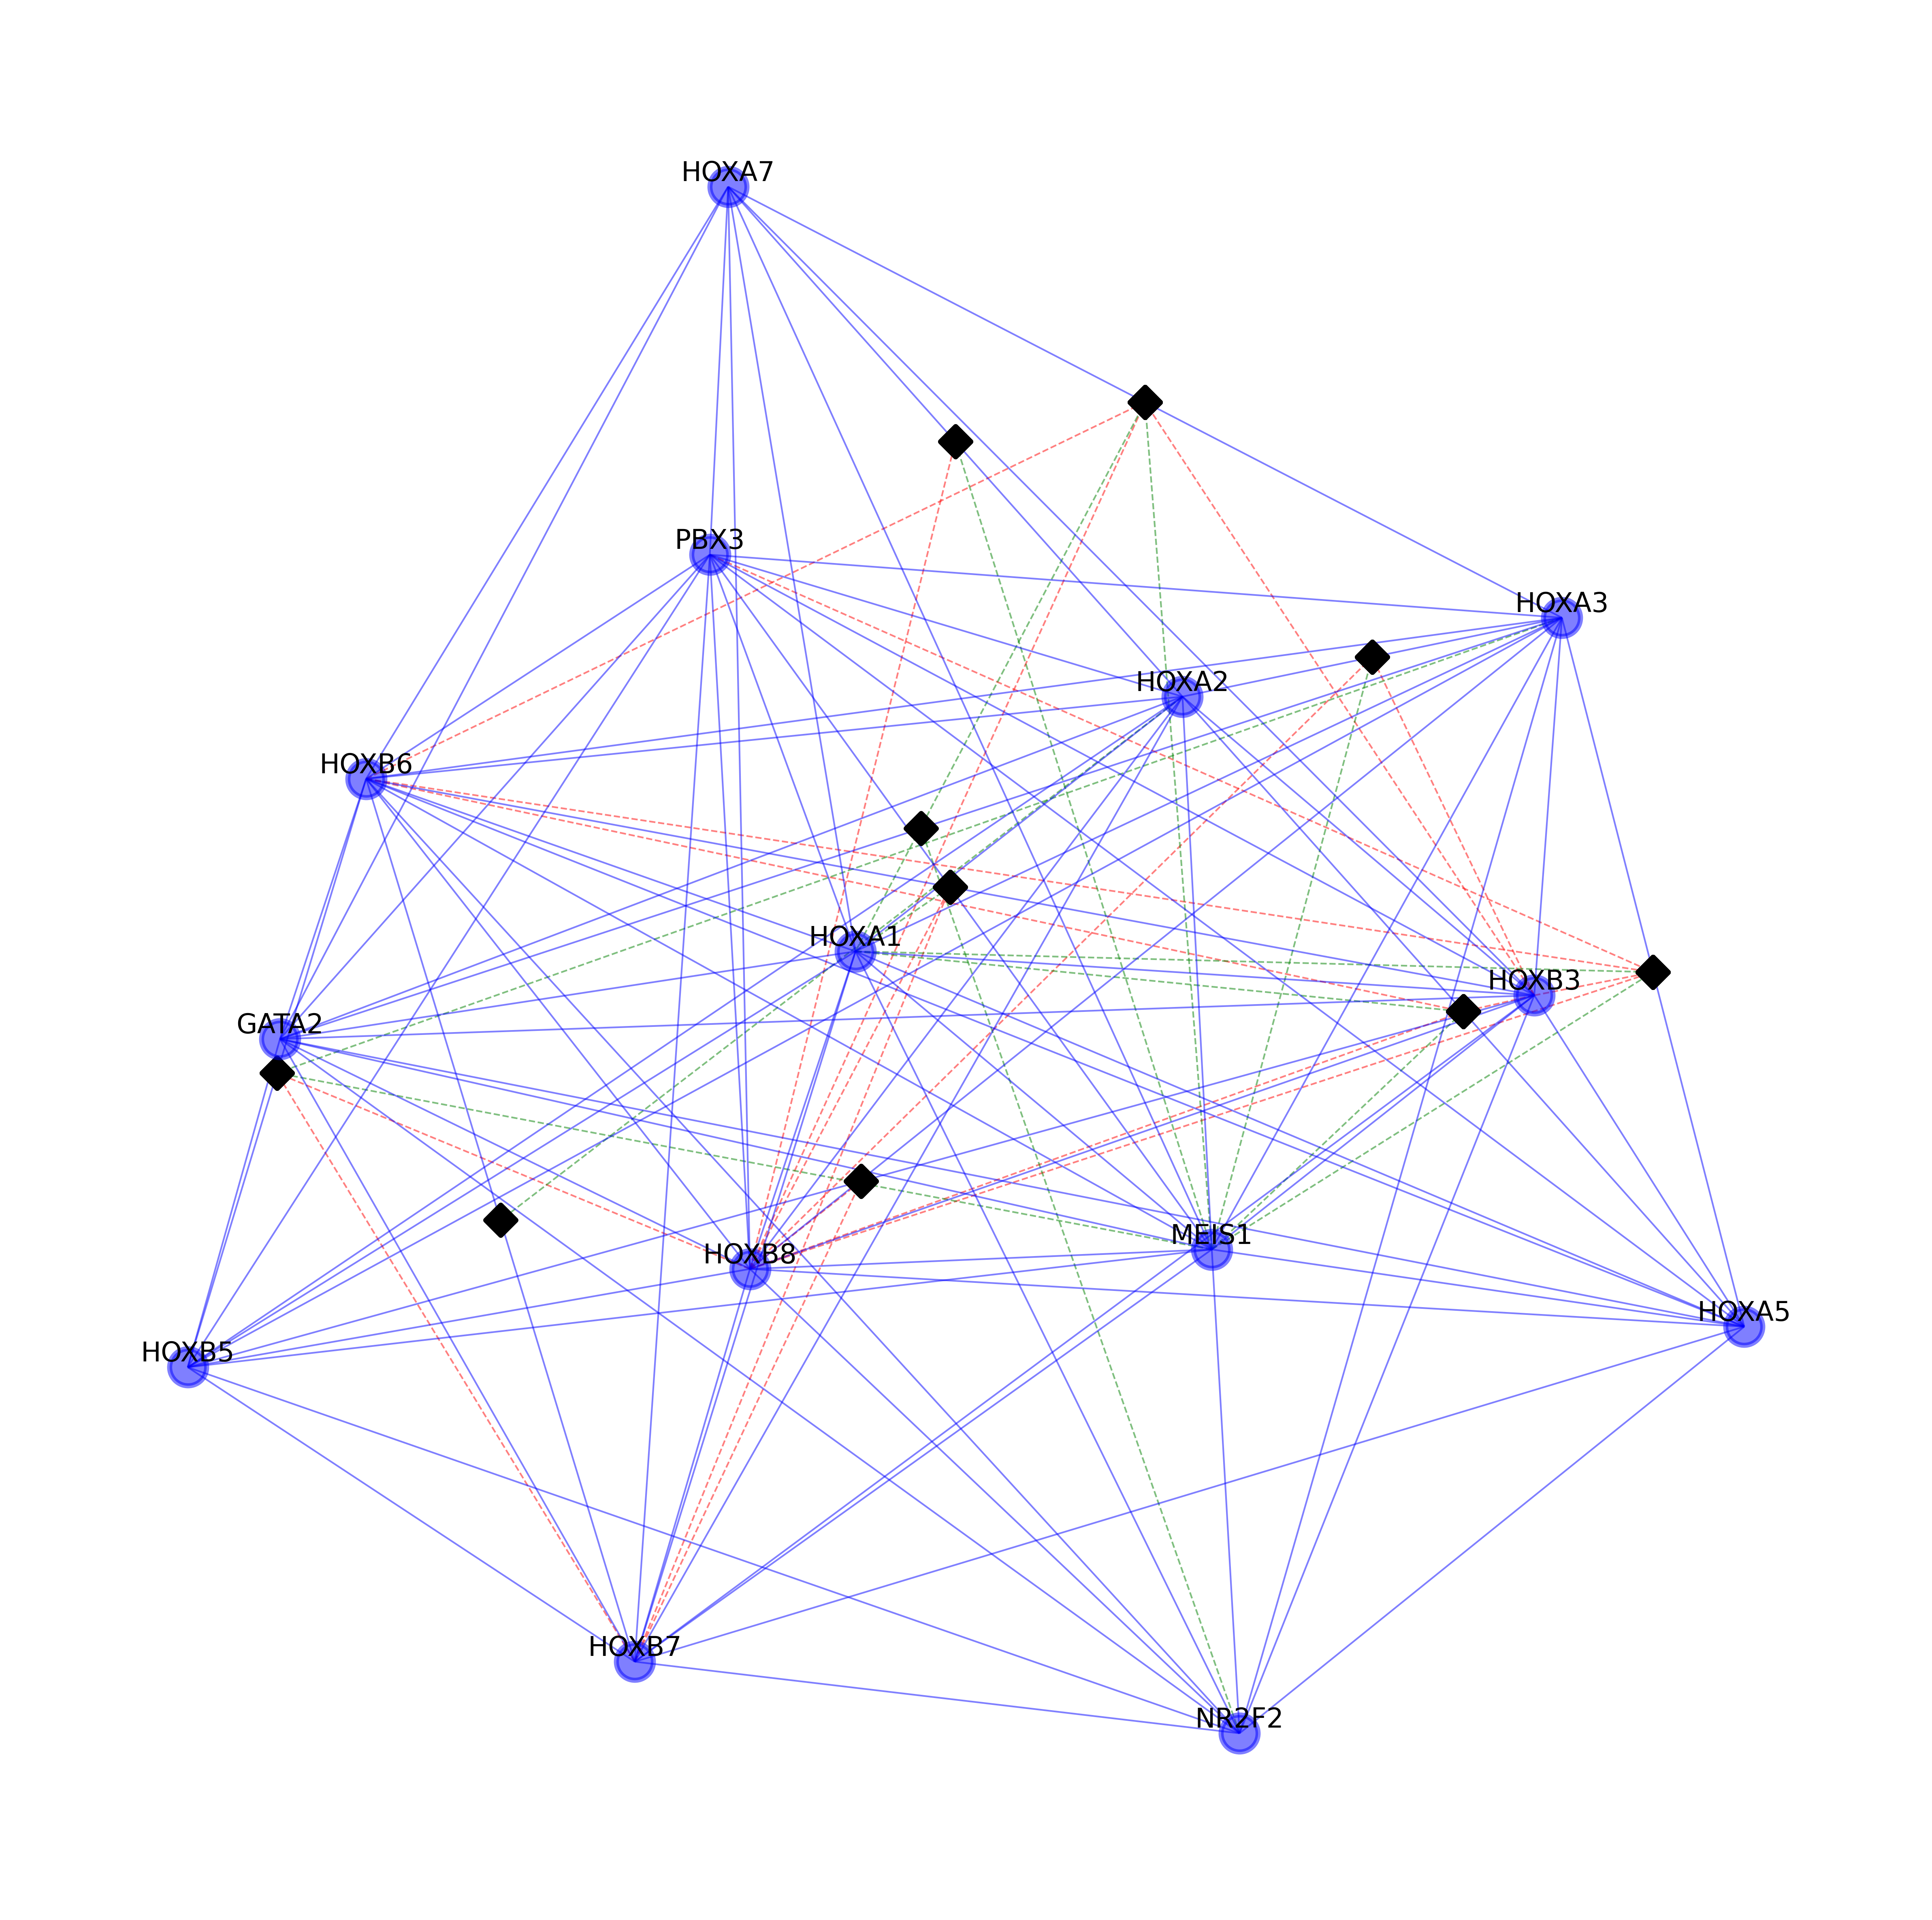

In [37]:
triadic_network_vis_from_data_and_graph(sub_graph, sub_final, top)